<a href="https://colab.research.google.com/github/wellmej/DataScienceUseCases/blob/main/Case2_My_Marketing_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Customers Segmentation
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1Q43AkxxDy4g-zl5lIX4_PBJtTguh4Ise)

![alt text](https://drive.google.com/uc?id=1uS6vsccMt3koetsp3k9cAIfbpJw7Z1J8)

![alt text](https://drive.google.com/uc?id=1r1FjdO8duujUoI904Oy4vbza6KktxSXo)

![alt text](https://drive.google.com/uc?id=1vMr3ouoZ6Pc1mba1mBm2eovlJ3tfE6JA)

![alt text](https://drive.google.com/uc?id=1VvqzWWY8wFGeP4cl-rVtWVOg1P6saHfZ)

![alt text](https://drive.google.com/uc?id=1LpdL0-4E9lbc4s-x6eJ5zkyIVw_OpHuJ)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [83]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

#from google.colab import drive
#drive.mount('/content/drive')

In [84]:
# You have to include the full link to the csv file containing your dataset

# You have to include the full link to the csv file containing your dataset - upload file to Google Collab first instead!!!
# C:\Users\jrwel\Documents\Udemy\Data Science Real-World Case Studies\Data\Case2
marketing_file = "Marketing_data.csv"
marketing_dir  = "C:/Users/jrwel/Documents/Udemy/Data Science Real-World Case Studies/Data/Case2/"

marketing_file_complete = marketing_dir + marketing_file
credit_card_df = pd.read_csv(marketing_file)
credit_card_df

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [85]:
os.listdir() 

['.config', 'Marketing_data.csv', 'sample_data']

In [86]:
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [87]:

credit_card_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [88]:
# Let's see who made one off purchase of $40761!
credit_card_df[credit_card_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [89]:
#------------------------------------------------------------------
# List exact valuer with maximum CASH_ADVANCE Value
#------------------------------------------------------------------
credit_card_df['CASH_ADVANCE'].max()
#credit_card_df[credit_card_df['CASH_ADVANCE'] == 47137.211760 ]

47137.211760000006

In [90]:
credit_card_df[credit_card_df['CASH_ADVANCE'] >= 47137.21176 ]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [91]:

#------------------------------------------------------------------
# List record with maximum CASH_ADVANCE Value
#------------------------------------------------------------------
credit_card_df[credit_card_df['CASH_ADVANCE'] >= 47137.211760000006 ]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [92]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

credit_card_df[credit_card_df['CASH_ADVANCE'] >= 47137.211760000006 ]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TASK #3: VISUALIZE AND EXPLORE DATASET

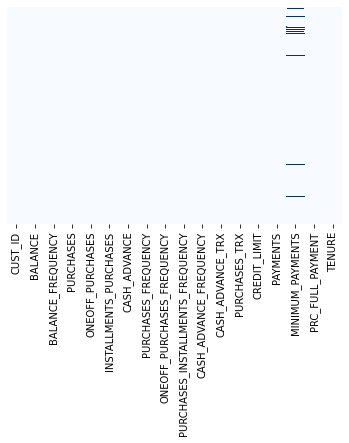

In [93]:
#-------------------------------------------------------------
# Let's see if we have any missing data
#-------------------------------------------------------------
sns.heatmap(credit_card_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [94]:
#-----------------------------------------------------------
#  Look at details of missing attributes
#-----------------------------------------------------------
credit_card_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [95]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENTS' 
credit_card_df.loc[(credit_card_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = credit_card_df['MINIMUM_PAYMENTS'].mean()

In [96]:
#------------------------------------------------------------------------------------------
#  Look at details of missing attributes to see if MINIMUM_PAYMENTS is now fully valued
#------------------------------------------------------------------------------------------
credit_card_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [97]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
credit_card_df.loc[(credit_card_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = credit_card_df['CREDIT_LIMIT'].mean()

In [98]:
#------------------------------------------------------------------------------------------
#  Look at details of missing attributes to see if CREDIT_LIMIT is now fully valued
#------------------------------------------------------------------------------------------
credit_card_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

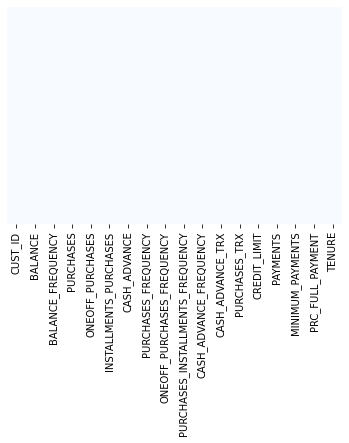

In [99]:
#---------------------------------------------------------------------
# Let's see now if we have any missing data, hopefully we don't!
#---------------------------------------------------------------------
sns.heatmap(credit_card_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [100]:
# Let's see if we have duplicated entries in the data
credit_card_df.duplicated().sum()

0

In [101]:
# Let's drop Customer ID since it has no meaning here 
credit_card_df.drop('CUST_ID', axis = 1, inplace = True)

In [102]:
credit_card_df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [103]:
#---------------------------------------------------------
# Show number of columns in remaining data frame
#---------------------------------------------------------
n = len(credit_card_df.columns)
n

17

In [104]:
#---------------------------------------------------------
# Show names of columns in remaining data frame
#---------------------------------------------------------
credit_card_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


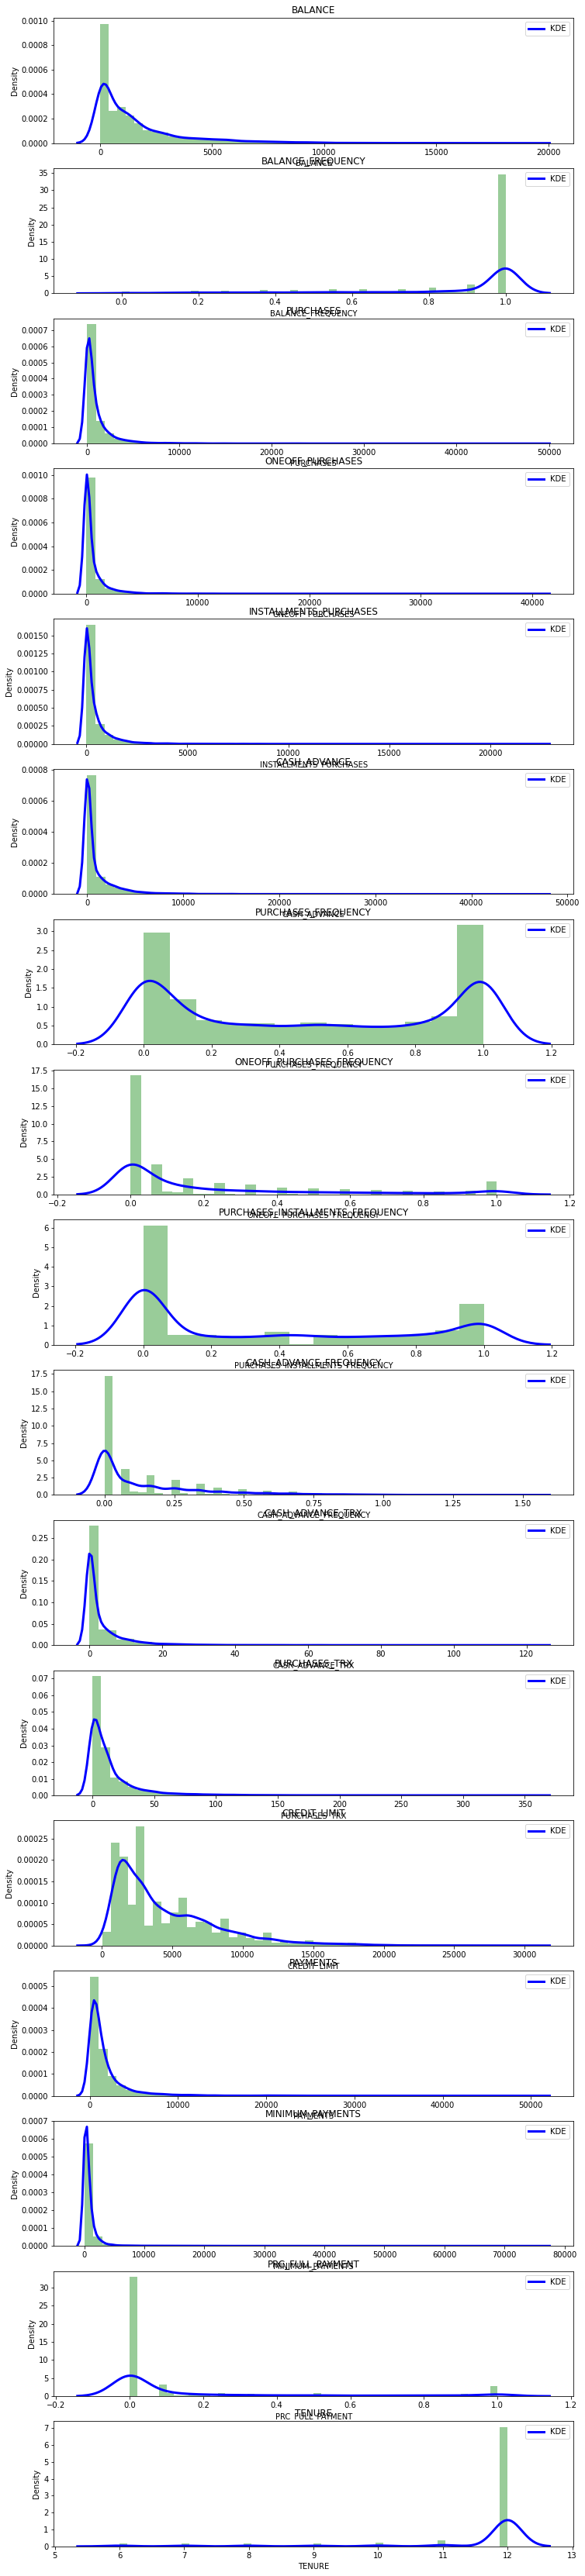

In [105]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize = (12,60))
for i in range(len(credit_card_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(credit_card_df[credit_card_df.columns[i]], kde_kws = {'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
  plt.title(credit_card_df.columns[i])
  plt.legend()
#  plt.tight_layout
  print (' ')



plt.tight_layout
plt.show()


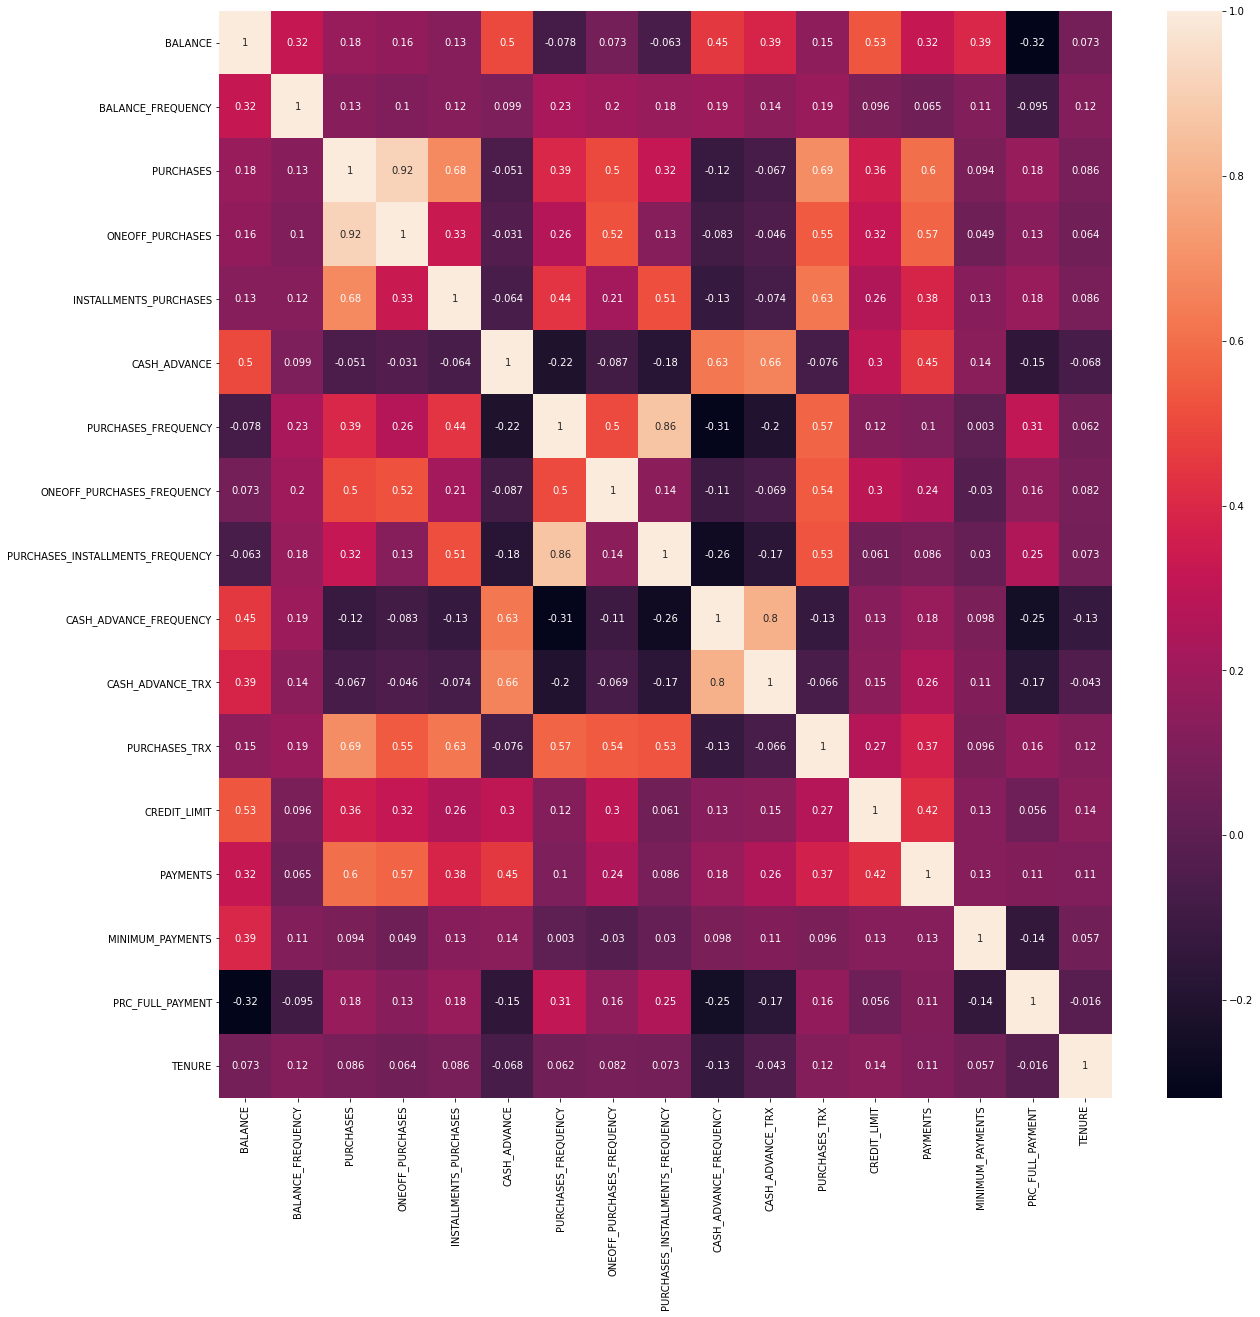

In [106]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
correlations = credit_card_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

In [107]:
#---------------------------------------------------------------------------------
# Interpretation
#
#  Example: Very strong correlation between PURCHASES and 
#           ONEOFF_PURCHASES (0.92).
#           Quite common to make purchases and oneoff purchases
#
#---------------------------------------------------------------------------------

In [108]:

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

![alt text](https://drive.google.com/uc?id=1EBCmP06GuRjVfPgTfH85Yhv9xIAZUj-K)

![alt text](https://drive.google.com/uc?id=1EYWyoec9Be9pYkOaJTjPooTPWgRlJ_Xz)

![alt text](https://drive.google.com/uc?id=1ppL-slQPatrmHbPBEaT3-8xNH01ckoNE)

![alt text](https://drive.google.com/uc?id=1Yfi-dpWW3keU5RLgwAT4YmQ2rfY1GxUh)

![alt text](https://drive.google.com/uc?id=1bLRDIZRda0NSTAdcbugasIjDjvgw4JIU)

![alt text](https://drive.google.com/uc?id=1rBQziDU0pS1Fz0m8VQRjQuBoGFSX1Spb)

![alt text](https://drive.google.com/uc?id=1BOX2q8R_8E4Icb4v1tpn1eymCTJY2b5o)

![alt text](https://drive.google.com/uc?id=1v7hJEPiigSeTTaYo0djbO-L4uEnTpcAU)

# TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [109]:
# Let's scale the data first
scaler = StandardScaler()
credit_card_df_scaled = scaler.fit_transform(credit_card_df)

In [110]:
credit_card_df_scaled.shape

(8950, 17)

In [111]:
credit_card_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [112]:
scores_1 = []

range_values = range (1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(credit_card_df_scaled)
  scores_1.append(kmeans.inertia_)

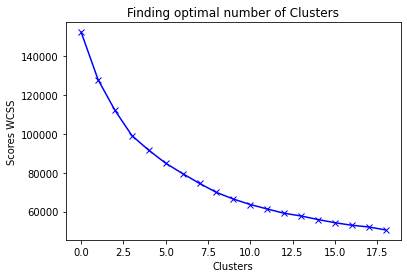

In [113]:
plt.plot(scores_1, 'bx-')
plt.title('Finding optimal number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()


In [114]:

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 8.

# TASK #6: APPLY K-MEANS METHOD

In [115]:
kmeans = KMeans(8)
kmeans.fit(credit_card_df_scaled)
labels = kmeans.labels_

In [116]:
labels.shape

(8950,)

In [117]:
labels

array([1, 4, 0, ..., 3, 3, 3], dtype=int32)

In [118]:
kmeans.cluster_centers_.shape

(8, 17)

In [119]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [credit_card_df.columns])  

In [120]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.361398,0.351094,0.045782,-0.077985,0.251224,-0.381953,0.997474,0.223307,0.913862,-0.490355,-0.370980,0.247212,-0.138762,-0.177734,-0.094182,0.366996,0.270750
1,-0.104179,0.396767,-0.341815,-0.222565,-0.399064,-0.186604,-0.803847,-0.345525,-0.746298,-0.027692,-0.123020,-0.464502,-0.384253,-0.278135,-0.075868,-0.449157,0.278177
2,0.555977,0.459275,1.841172,1.581124,1.448581,-0.232929,1.155246,1.790698,0.983780,-0.340874,-0.258205,2.164167,1.124249,0.982166,0.215198,0.438237,0.311230
3,-0.348435,-0.333251,-0.282612,-0.209831,-0.282381,0.052235,-0.165233,-0.269285,-0.202746,0.285169,-0.012078,-0.378908,-0.567803,-0.390981,-0.209514,0.027602,-3.195525
4,1.408195,0.415452,-0.288295,-0.208696,-0.298310,1.116069,-0.585295,-0.290066,-0.516155,1.437955,1.094616,-0.357657,0.748718,0.207837,0.557497,-0.452750,0.122047
5,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
6,1.731053,0.340992,0.012076,0.012468,0.005315,3.921151,-0.234088,0.042168,-0.185366,2.589045,3.756316,0.006179,1.275535,2.582569,0.547617,-0.206090,0.058138
7,-0.701971,-2.150930,-0.307030,-0.231704,-0.300173,-0.322750,-0.539698,-0.440107,-0.426610,-0.521288,-0.377885,-0.415763,-0.172534,-0.200911,-0.256825,0.287643,0.199881


In [121]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [credit_card_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,812.256140,0.960442,1101.018903,462.998652,638.245949,177.898865,0.890685,0.269075,0.727629,0.037019,0.717160,20.854594,3989.577629,1218.620399,644.718410,0.261055,11.879651
1,1347.634307,0.971261,272.911636,223.025536,50.199062,587.553011,0.167728,0.099381,0.067839,0.129603,2.409306,3.164038,3096.378812,927.971717,687.398599,0.022344,11.889590
2,2721.694017,0.986069,4936.898029,3216.778735,1721.001647,490.408032,0.954007,0.736658,0.755417,0.066932,1.486765,68.502941,8584.926471,4576.419228,1365.715595,0.281892,11.933824
3,839.236134,0.798327,399.399366,244.160729,155.714073,1088.411274,0.424035,0.122125,0.283861,0.192209,3.166403,5.291601,2428.549048,601.293316,375.942915,0.161788,7.240887
4,4495.513438,0.975687,387.257531,246.045205,141.309247,3319.319705,0.255443,0.115925,0.159304,0.422894,10.718780,5.819828,7218.593466,2334.812173,2163.428637,0.021293,11.680648
5,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
6,5167.516172,0.958049,1029.005073,613.131561,415.873512,9201.708454,0.396400,0.215037,0.290768,0.653238,28.882927,14.863415,9135.365854,9209.427369,2140.406010,0.093437,11.595122
7,103.382131,0.367735,347.230008,207.855392,139.625080,302.050205,0.273743,0.071165,0.194892,0.030829,0.670042,4.375527,3866.699953,1151.524770,265.687067,0.237845,11.784810


In [122]:
labels.shape

(8950,)

In [123]:
labels.max()

7

In [124]:
labels.min()

0

In [125]:
#---------------------------------------------------------------------------------
# labels represents an array with the designated cluster number for each row
# of our input Marketing dataset.
#---------------------------------------------------------------------------------
labels

array([1, 4, 0, ..., 3, 3, 3], dtype=int32)

In [126]:
#------------------------------------
# List out original dataframe
#------------------------------------
credit_card_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [127]:
# concatenate the clusters labels to our original dataframe

credit_card_df_cluster = pd.concat([credit_card_df, pd.DataFrame({'cluster':labels})], axis = 1)
credit_card_df_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


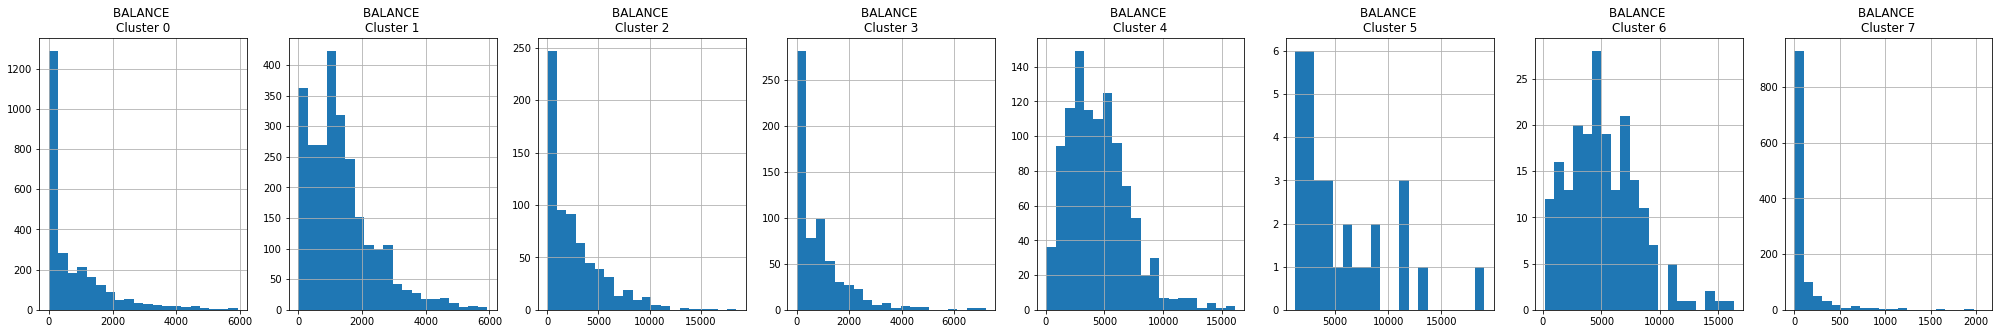

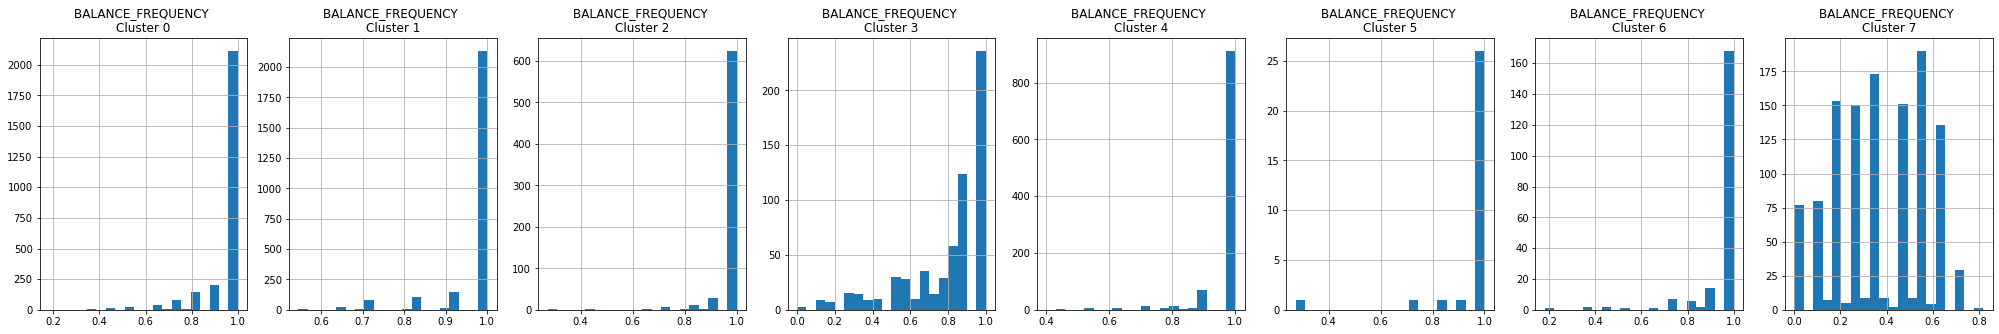

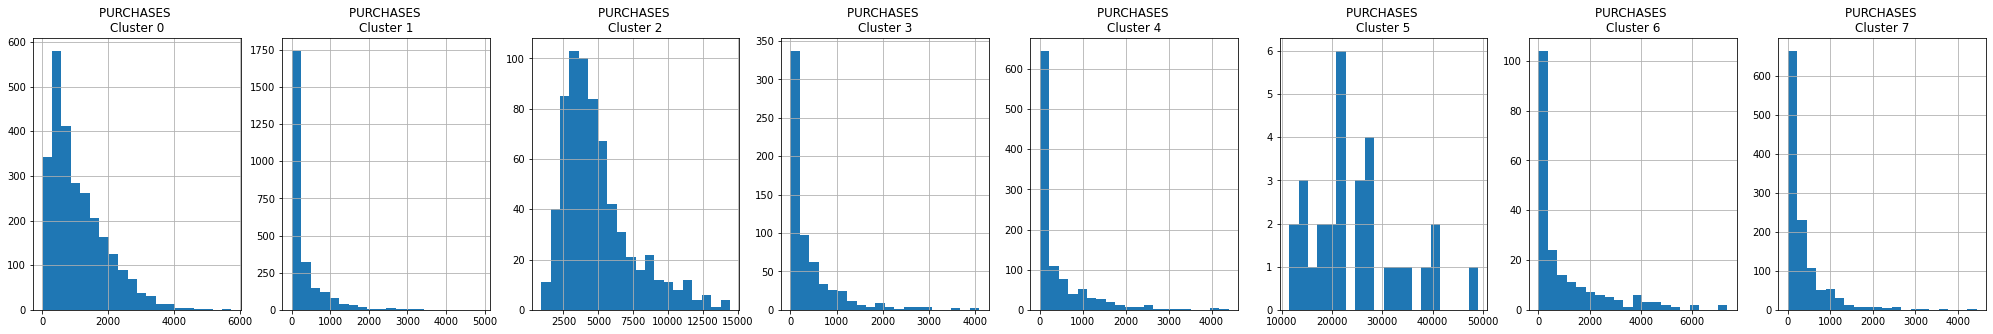

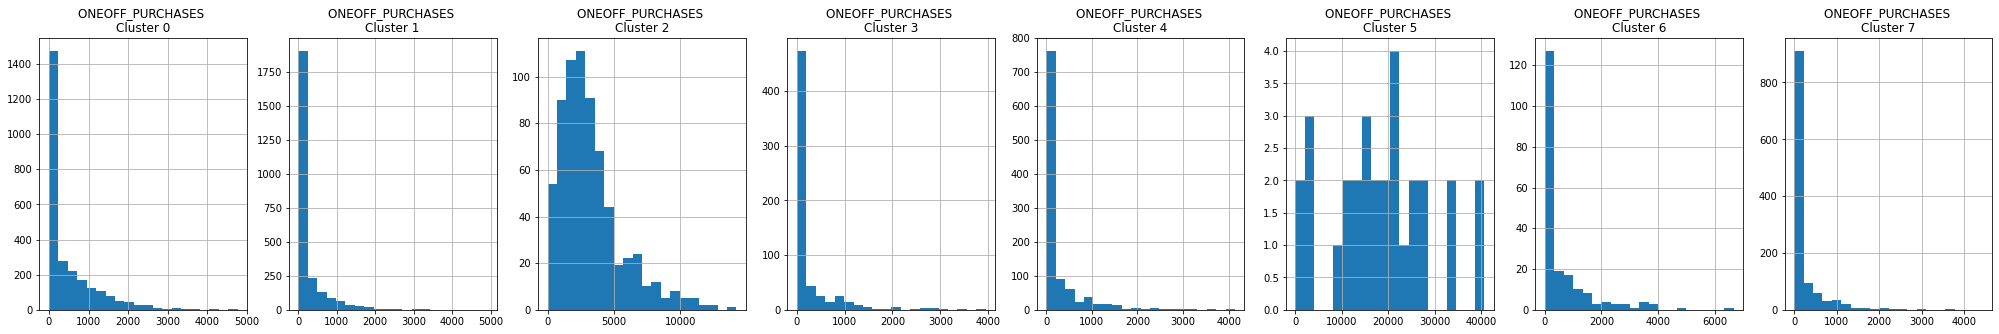

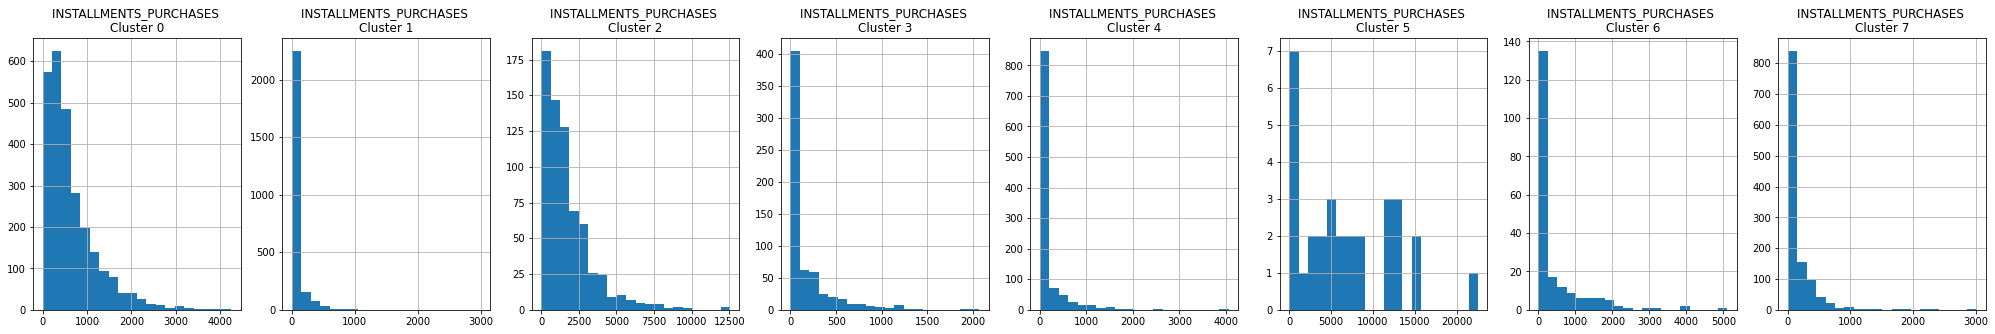

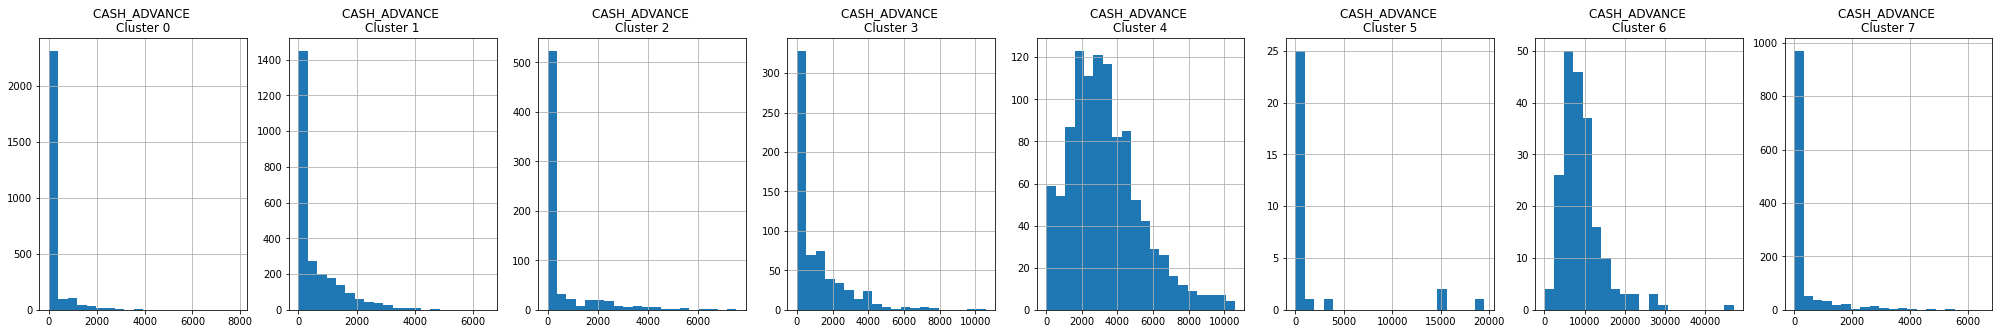

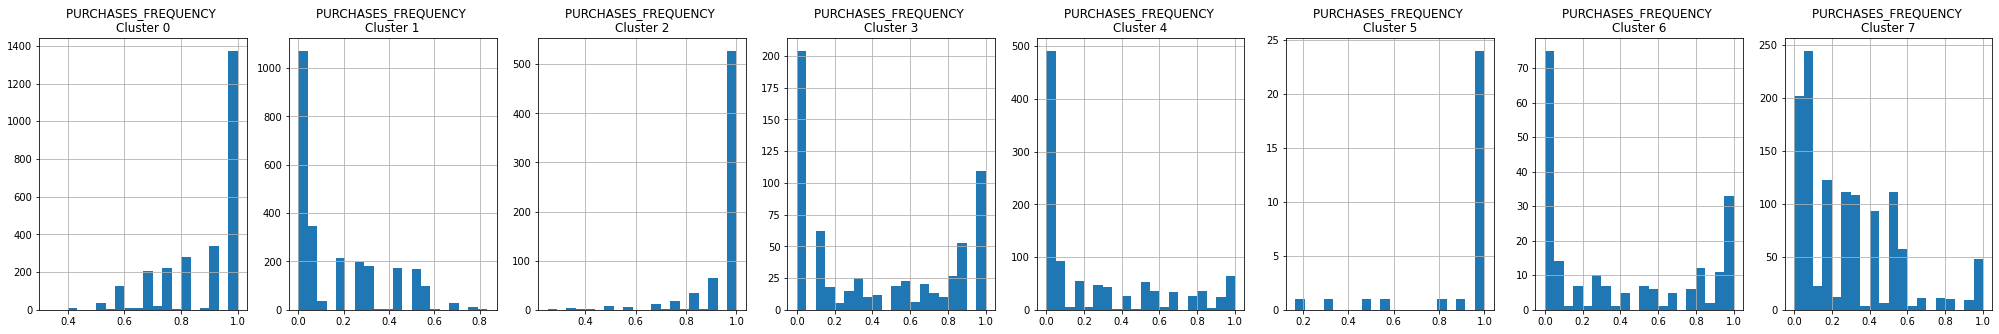

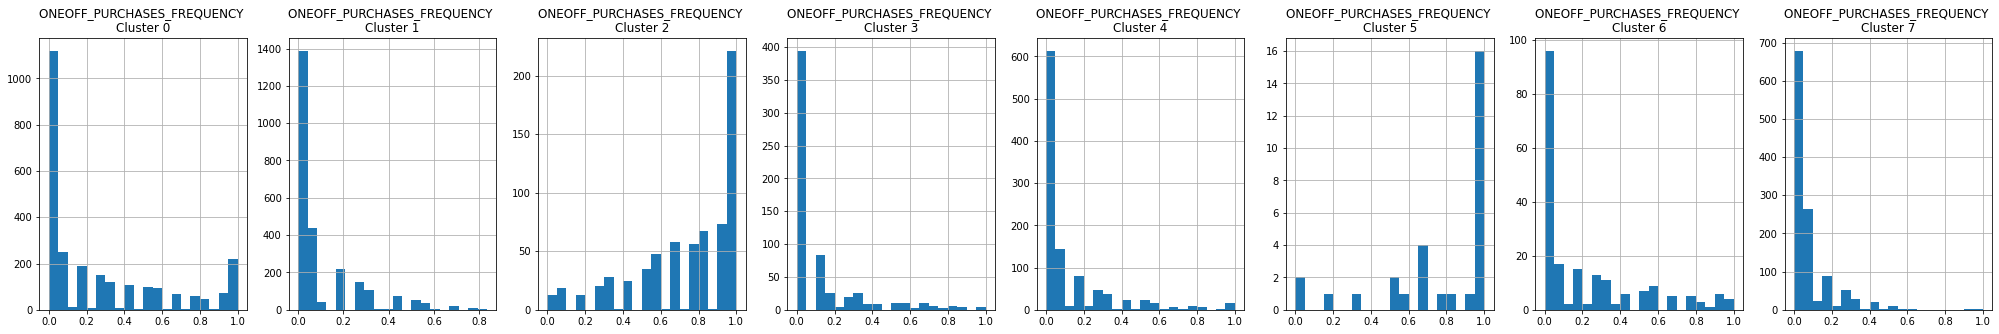

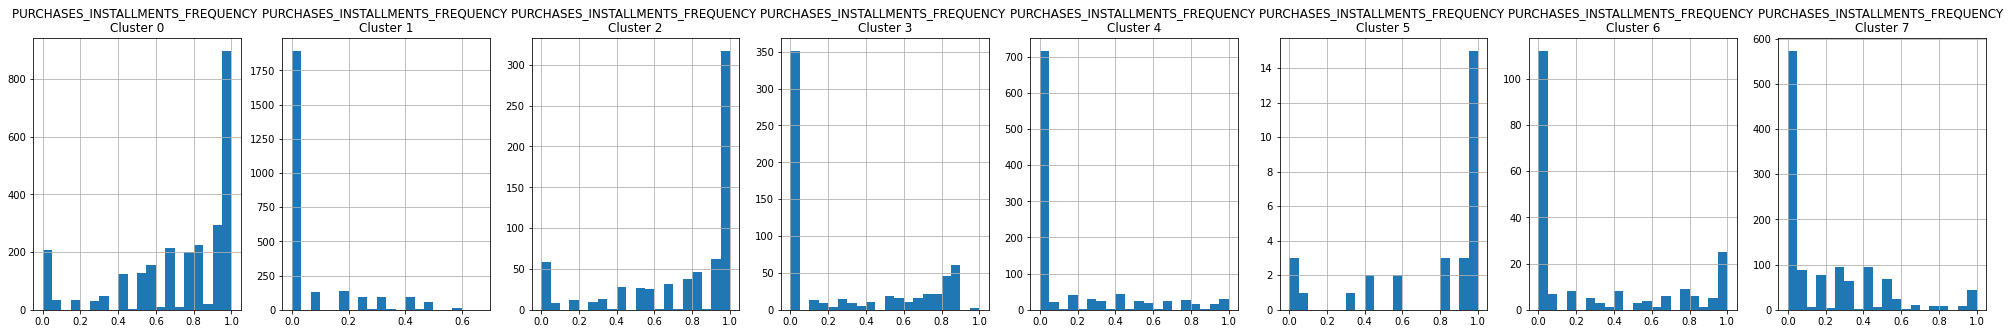

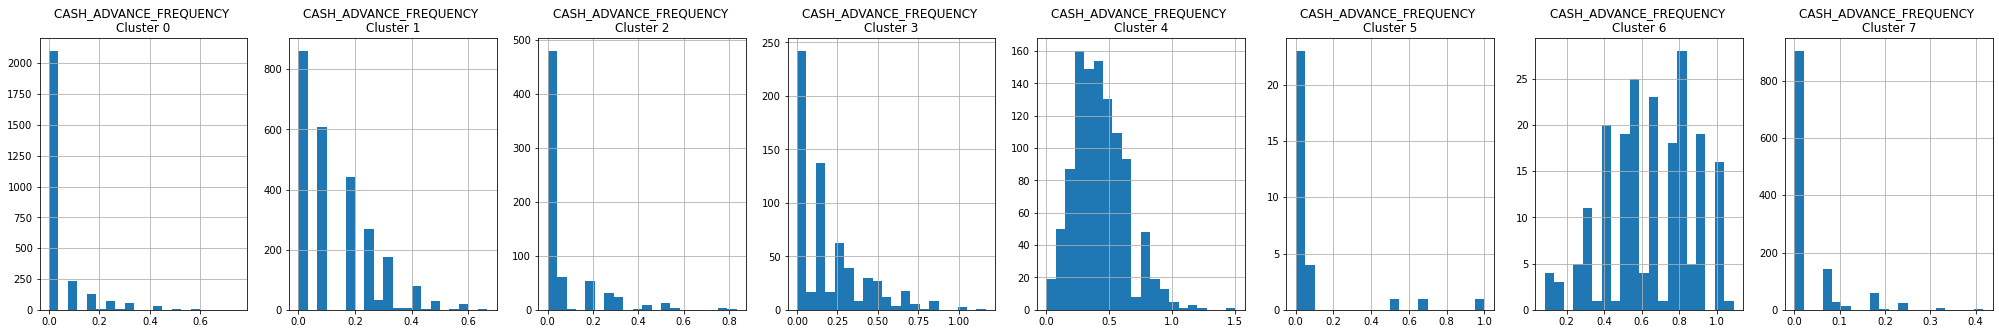

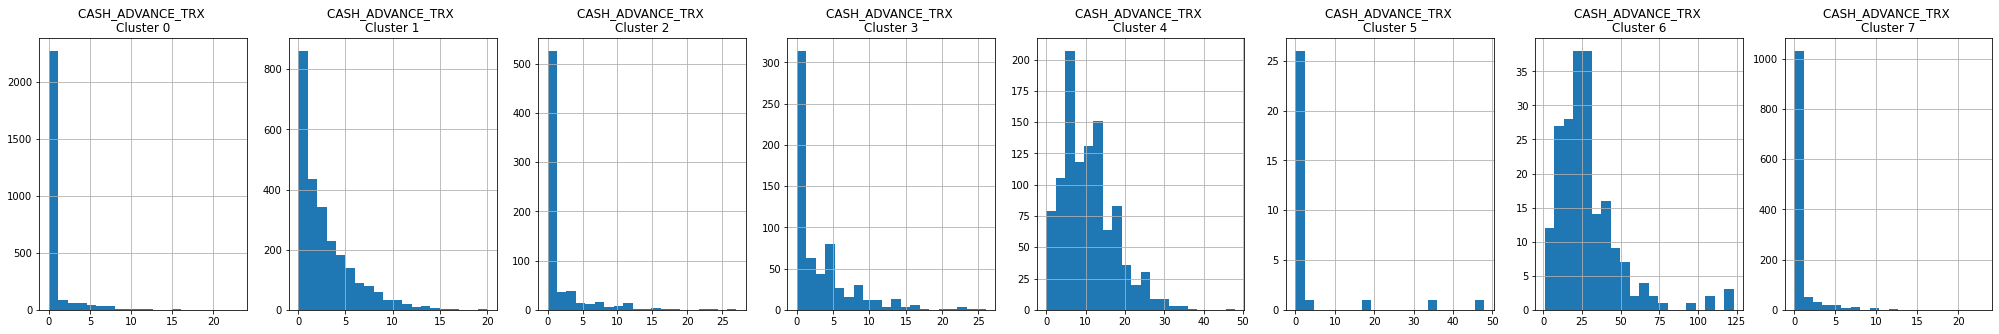

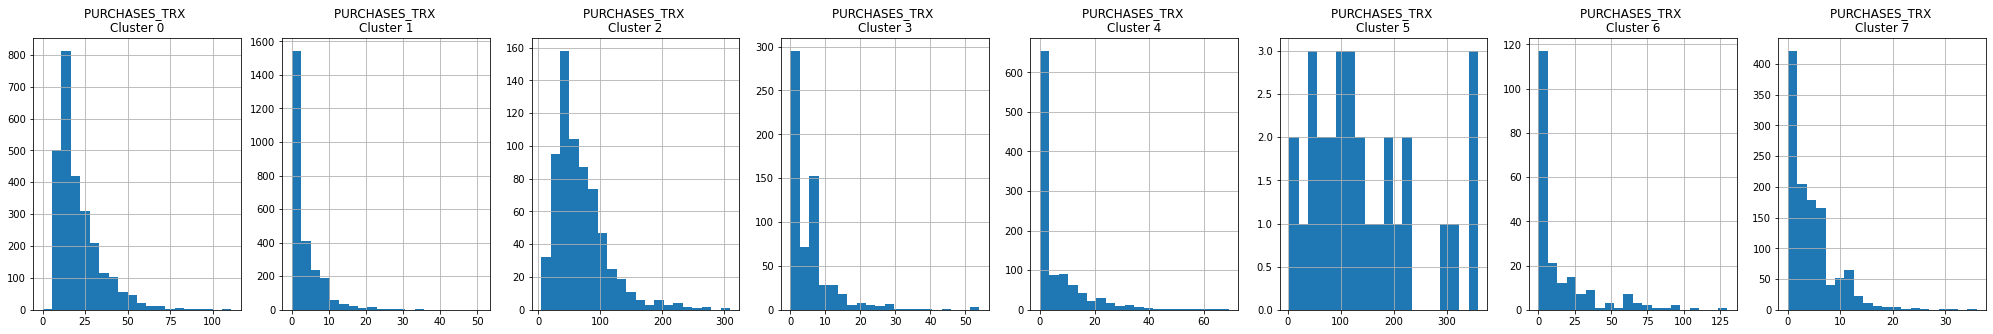

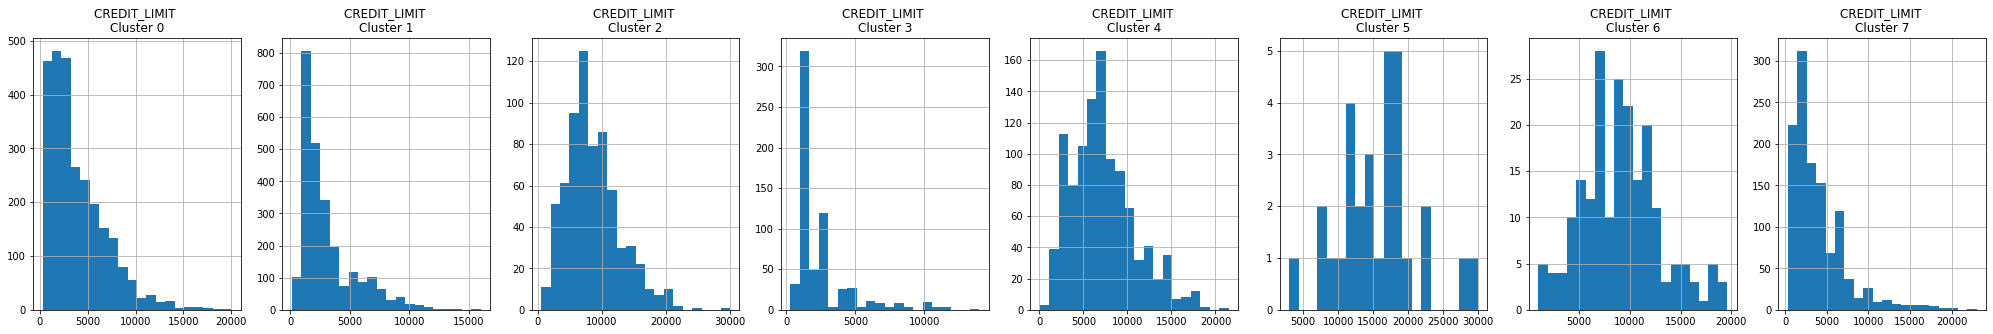

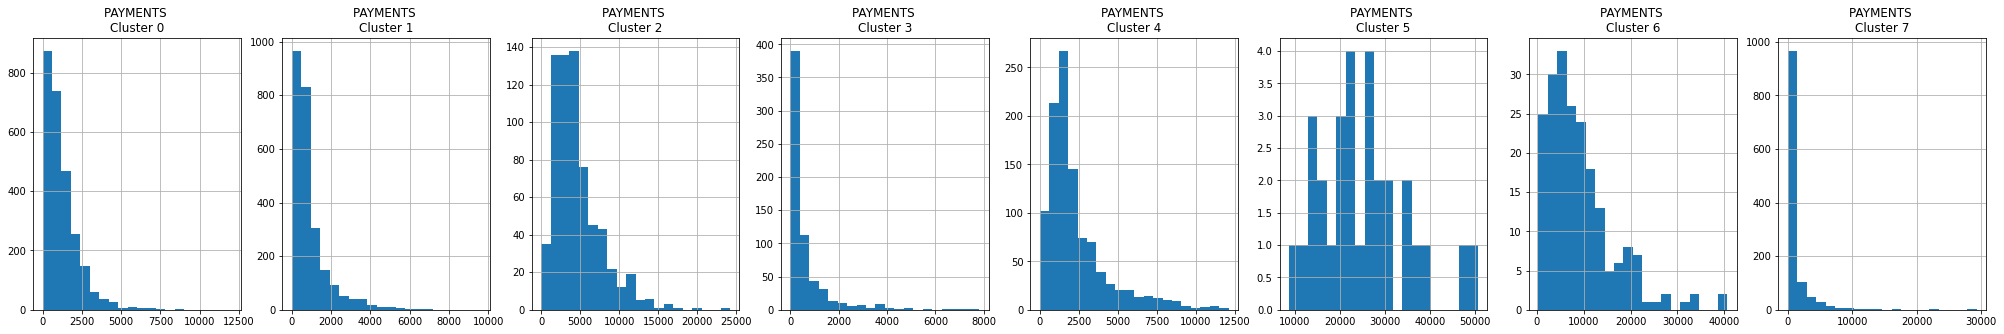

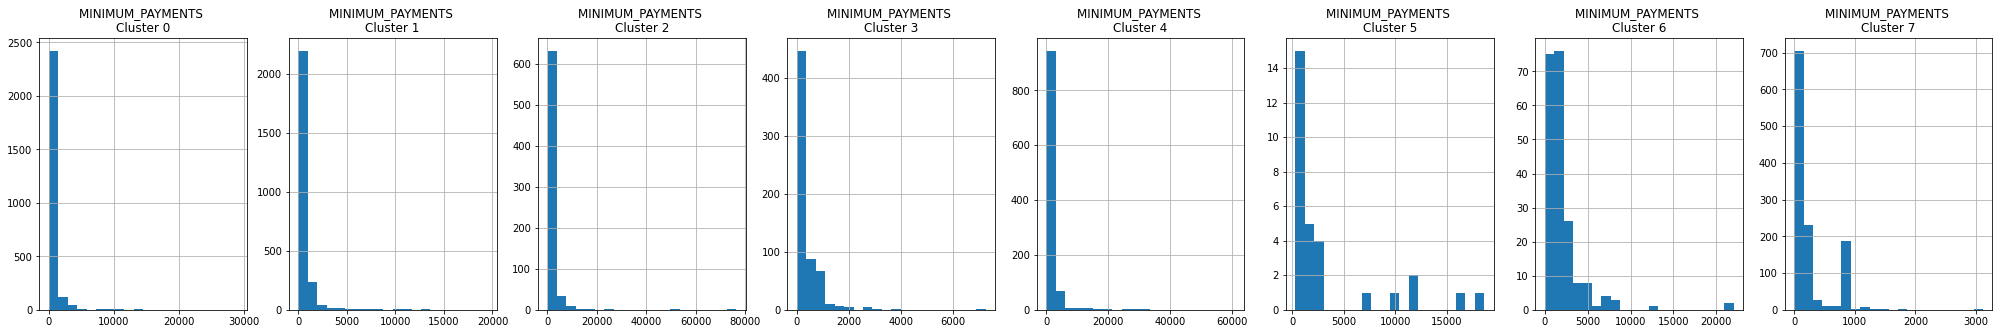

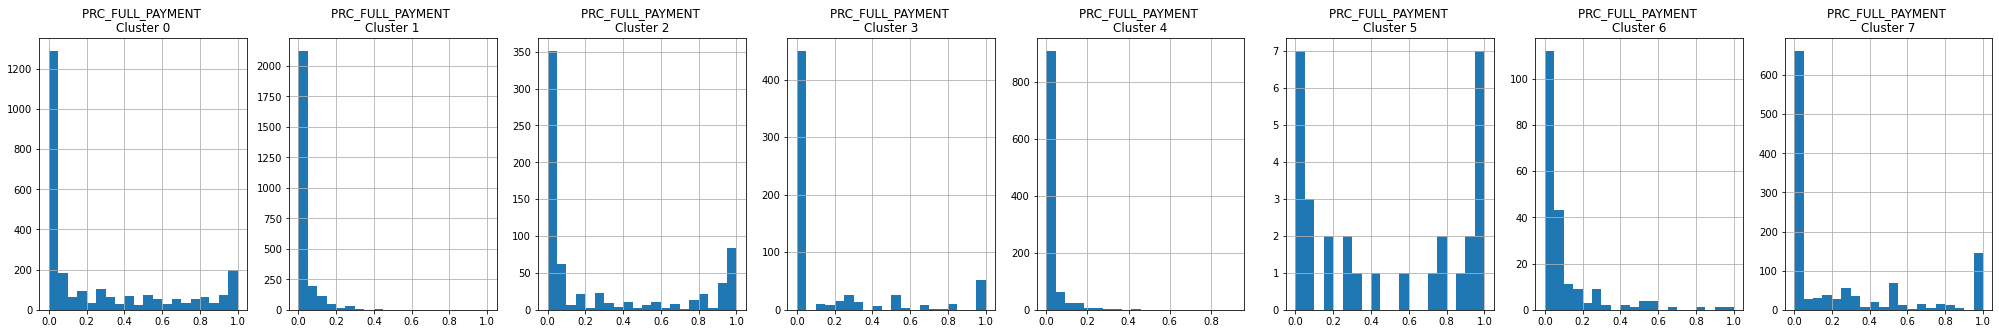

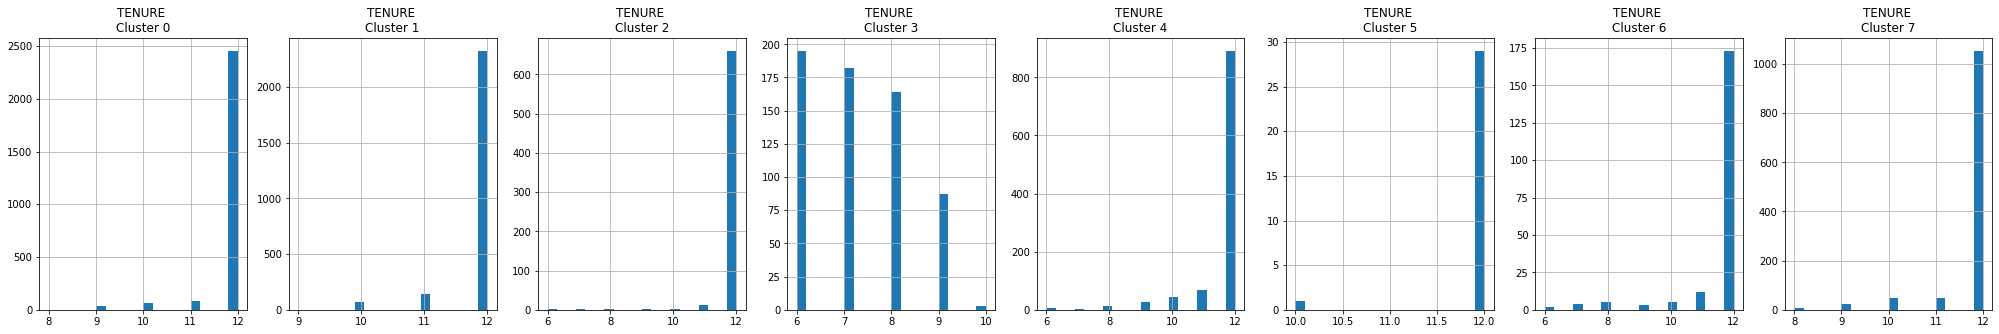

In [128]:
#----------------------------------------------------------------------------------------
# Plot the histogram of various clusters
#
#  For every single cluster, plot the Historgram for each column
#----------------------------------------------------------------------------------------
for i in credit_card_df.columns:
  plt.figure(figsize = (35,5))
  for j in range(8):
    plt.subplot(1,8, j+1)
    cluster = credit_card_df_cluster[credit_card_df_cluster['cluster'] == j ]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i,j))

  plt.show()

# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [129]:
#----------------------------------------------------------------------------
# Obtain the principal components 
#
#  Let's reduce our number of features to just two by using PCA
#----------------------------------------------------------------------------
pca = PCA(n_components = 2)
principle_comp = pca.fit_transform(credit_card_df_scaled)
principle_comp

array([[-1.68221905, -1.07643968],
       [-1.13828724,  2.50652427],
       [ 0.96968889, -0.38345531],
       ...,
       [-0.92620617, -1.81080023],
       [-2.33655494, -0.65799568],
       [-0.55642232, -0.40047175]])

In [130]:
#----------------------------------------------------------------------------
# Create a dataframe with the two components
#  Name the new columns 'pca1' and 'pca2'
#----------------------------------------------------------------------------
pca_df = pd.DataFrame(data = principle_comp, columns = ['pca1', 'pca2'])
pca_df.head(10)

,pca1,pca2
0,-1.682219,-1.076440
1,-1.138287,2.506524
2,0.969689,-0.383455
3,-0.873626,0.043176
4,-1.599434,-0.688575
5,0.251297,-0.780024
6,6.352918,-0.692586
7,0.277101,-1.290734
8,-0.441742,-0.461843
9,-0.562506,-0.366352


In [131]:
#----------------------------------------------------------------------------
# Concatenate the clusters labels to the dataframe
# This is similar to what we did above earlier
#----------------------------------------------------------------------------
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head(10)

,pca1,pca2,cluster
0,-1.682219,-1.076440,1
1,-1.138287,2.506524,4
2,0.969689,-0.383455,0
3,-0.873626,0.043176,1
4,-1.599434,-0.688575,1
5,0.251297,-0.780024,0
6,6.352918,-0.692586,2
7,0.277101,-1.290734,0
8,-0.441742,-0.461843,1
9,-0.562506,-0.366352,7


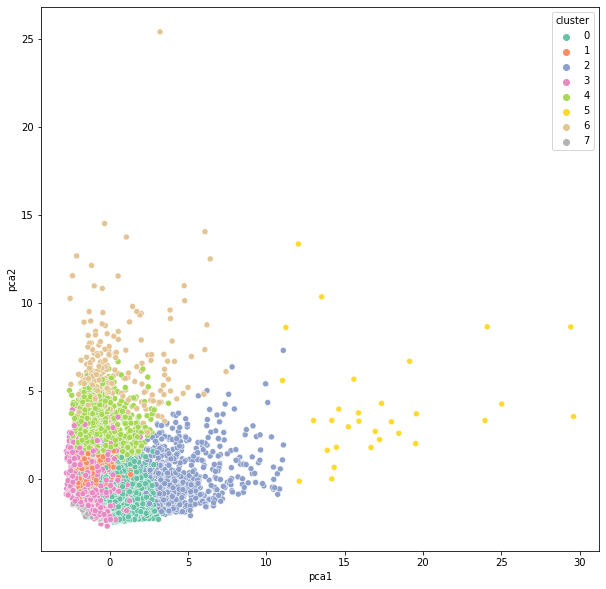

In [132]:
#----------------------------------------------------------------------------
# Plot a scatter plot of the
#----------------------------------------------------------------------------
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = 'Set2' )

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [133]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D ,BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPool2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD
# SGD - Schotastic Gradient Decent

In [134]:
#--------------------------------------------------------------
#  Build Dense Layers of the Neural Network
#
#   relu = Rectivied Linear Unit
#
#   kernel_initializer:
#    GlorotUniform class
#    tf.keras.initializers.GlorotUniform(seed=None)
#    The Glorot uniform initializer, also called Xavier uniform initializer.
#   
#    Also available via the shortcut function tf.keras.initializers.glorot_uniform.
#   
#    Draws samples from a uniform distribution within [-limit, limit], 
#    where limit = sqrt(6 / (fan_in + fan_out)) (fan_in is the number of input units 
#    in the weight tensor and fan_out is the number of output units).
#--------------------------------------------------------------
input_df = Input(shape= (17,))

encoding_dim = 7

# Build the 'encoder' network
x = Dense(encoding_dim, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

# Build the 'decoder' network (inverse of the 'encoder' network)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

# Build the Autoencoder
#  Auto encoder takes in the input and the output is decoded version
autoencoder = Model(input_df, decoded)

# Encoder Part of the Autoencoder (compressed version)
encoded = Model(input_df, encoded)






In [135]:
# Check shapes of our input dataframe
credit_card_df_scaled.shape

(8950, 17)

In [136]:
# Compile the Auto encoder
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [137]:
#---------------------------------------
#  Train the Autoencoder 
#
#    Note: Input and Output attributes are the same
#---------------------------------------
autoencoder.fit(credit_card_df_scaled, credit_card_df_scaled, batch_size = 128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 4s 51ms/step - loss: 0.5222
Epoch 2/25
70/70 [==============================] - 3s 49ms/step - loss: 0.2671
Epoch 3/25
70/70 [==============================] - 3s 49ms/step - loss: 0.2056
Epoch 4/25
70/70 [==============================] - 3s 48ms/step - loss: 0.1809
Epoch 5/25
70/70 [==============================] - 3s 48ms/step - loss: 0.1500
Epoch 6/25
70/70 [==============================] - 3s 49ms/step - loss: 0.1321
Epoch 7/25
70/70 [==============================] - 3s 48ms/step - loss: 0.1224
Epoch 8/25
70/70 [==============================] - 3s 48ms/step - loss: 0.1122
Epoch 9/25
70/70 [==============================] - 3s 49ms/step - loss: 0.1026
Epoch 10/25
70/70 [==============================] - 3s 49ms/step - loss: 0.0965
Epoch 11/25
70/70 [==============================] - 3s 49ms/step - loss: 0.0919
Epoch 12/25
70/70 [==============================] - 3s 49ms/step - loss: 0.0813
Epoch 13/25
70/70 [==================

In [138]:
#-------------------------------------------------------
# Look at the architecture of the Autoencoder
#-------------------------------------------------------
autoencoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_9 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_13 (Dense)             (None, 2000)             

In [139]:
#----------------------------------------------------------
#  Perform Diminsionality Reduction via Autoencoding
#
#  Use K-Means to the reduced features
#----------------------------------------------------------
predict = encoded.predict(credit_card_df_scaled)


In [59]:
#--------------------------------------------------------------------
#  The 17 original features have been reduced to 10 features
#  by the auto encoding process
#
#  From the new 10 features, we will:
#
#  1. Find the optimal number of clusters
#  2. Apply kmeans algortihm
#  3. Perform Principal Component Analysis (PCA) and visualize the 
#     components
#--------------------------------------------------------------------
predict.shape

(8950, 10)

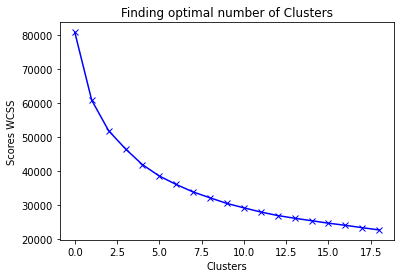

In [140]:
#----------------------------------------------------------------
#  Find the optimal number of clusters on the new 10 features
#----------------------------------------------------------------
scores_2 = []

range_values = range (1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(predict)
  scores_2.append(kmeans.inertia_)

#  Plot the kmeans graph to find the elbow
plt.plot(scores_2, 'bx-')
plt.title('Finding optimal number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()


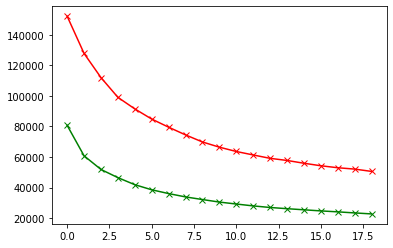

In [141]:
#----------------------------------------------------------------------
# Plot scores_1 versus scores_2 to get a feel for the difference
# between the 17 features and the 10 features
#----------------------------------------------------------------------
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

# We see that now 4 or 5 is the optimal number of clusters

In [142]:
predict_df = pd.DataFrame(data = predict)

In [143]:
predict_df.head(5)

,0,1,2,3,4,5,6,7,8,9
0,0.323358,0.665950,0.270828,0.348994,0.468097,0.000000,0.0,0.447441,0.000000,0.0
1,0.751550,0.997056,0.234154,1.913522,0.000000,0.328052,0.0,0.664569,2.055756,0.0
2,0.000000,0.339688,1.505631,1.776792,2.923794,0.872961,0.0,0.740955,0.101567,0.0
3,0.456717,0.896187,0.874113,1.292145,1.752384,0.000000,0.0,1.121932,0.858915,0.0
4,0.251725,0.525702,0.320142,0.569991,0.353388,0.000000,0.0,0.459053,0.048040,0.0


Let's use 4 as the optimal number of clusters

In [144]:
#----------------------------------------------------------------
#  Apply K-means algorithm
#----------------------------------------------------------------
optimal_clusters = 4
kmeans = KMeans(optimal_clusters)
#kmeans.fit(predict_df)
kmeans.fit(predict)
labels = kmeans.labels_


In [145]:
labels.shape

(8950,)

In [146]:
labels

array([0, 0, 3, ..., 3, 0, 3], dtype=int32)

In [147]:
kmeans.cluster_centers_.shape

(4, 10)

In [148]:
predict.shape

(8950, 10)

In [149]:

#cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [predict_df.columns])  

In [150]:
#cluster_centers

In [151]:
# In order to understand what these numbers mean, let's perform inverse transformation
#cluster_centers = scaler.inverse_transform(cluster_centers)
#cluster_centers = pd.DataFrame(data = cluster_centers, columns = [predict_df.columns])
#cluster_centers

In [153]:
labels.max()

3

In [154]:
labels.min()

0

In [155]:
# concatenate the clusters labels to our original dataframe

predict_cluster = pd.concat([credit_card_df, pd.DataFrame({'cluster':labels})], axis = 1)
predict_cluster.head()


#credit_card_df_cluster = pd.concat([credit_card_df, pd.DataFrame({'cluster':labels})], axis = 1)
#credit_card_df_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


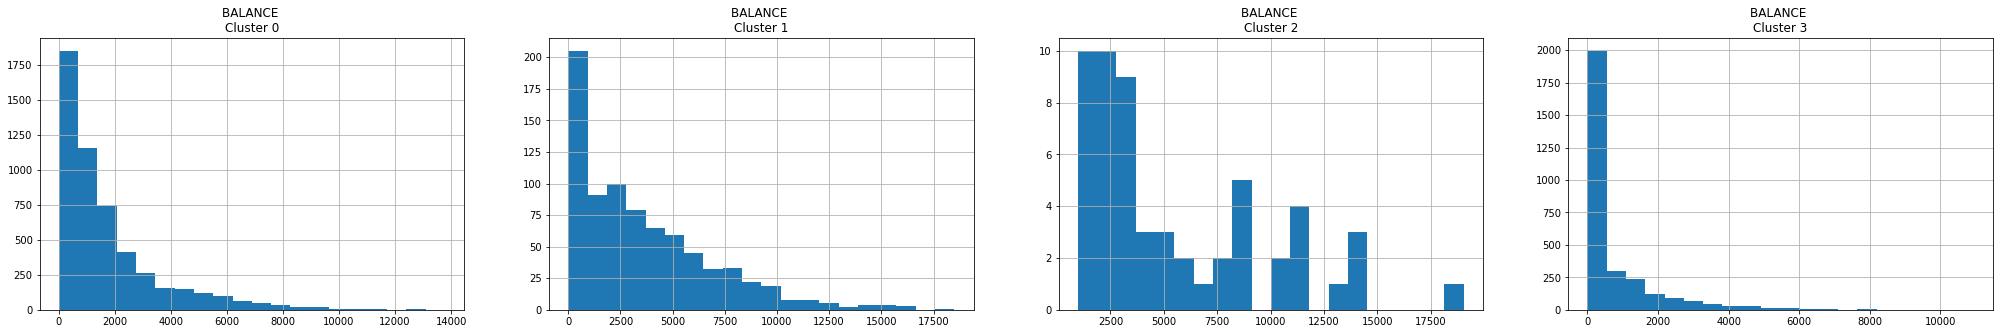

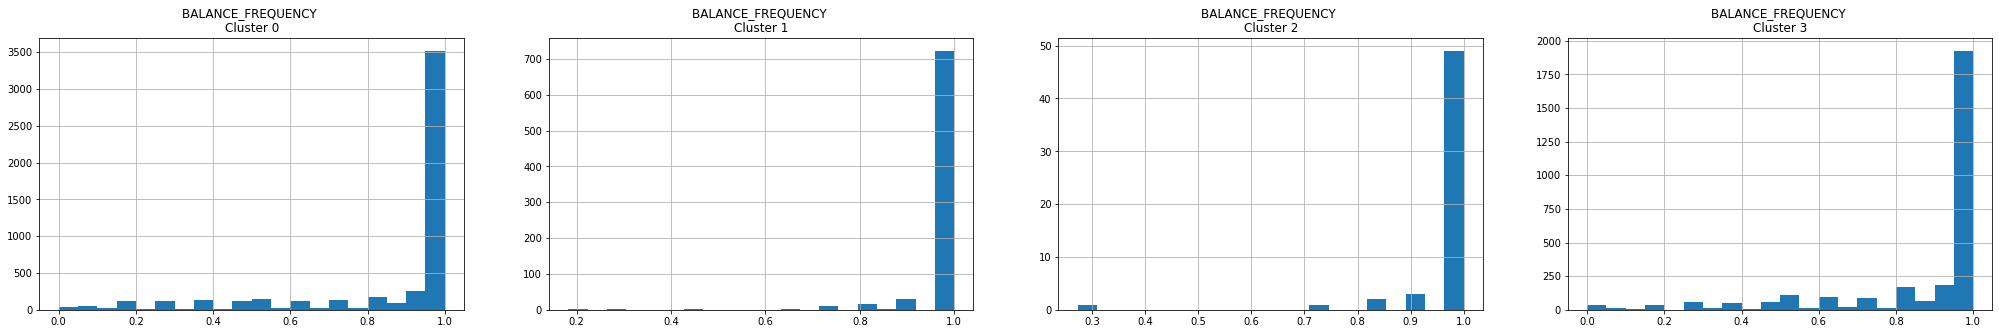

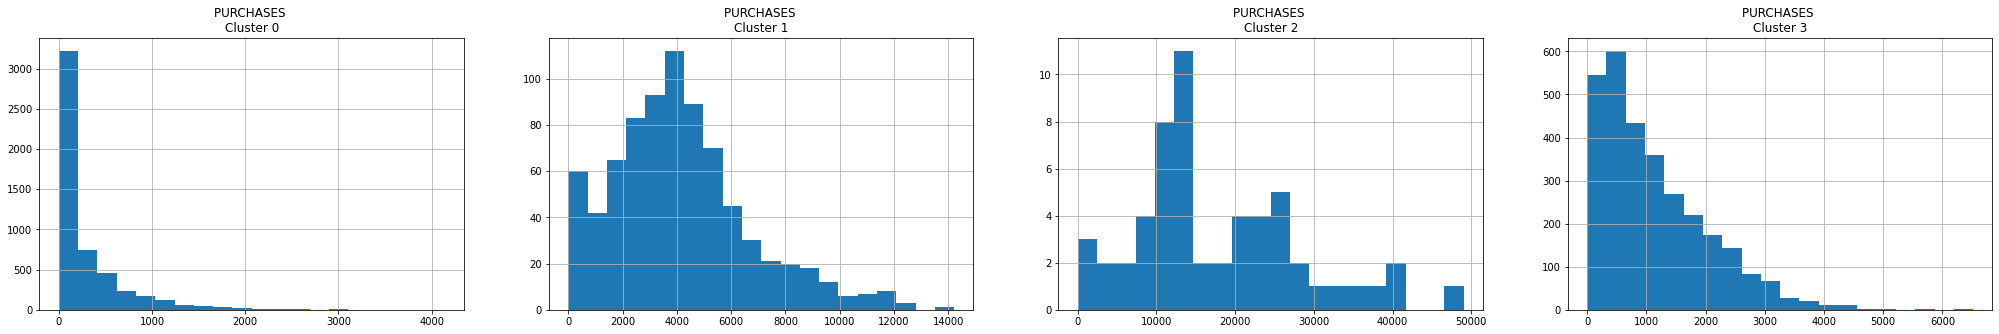

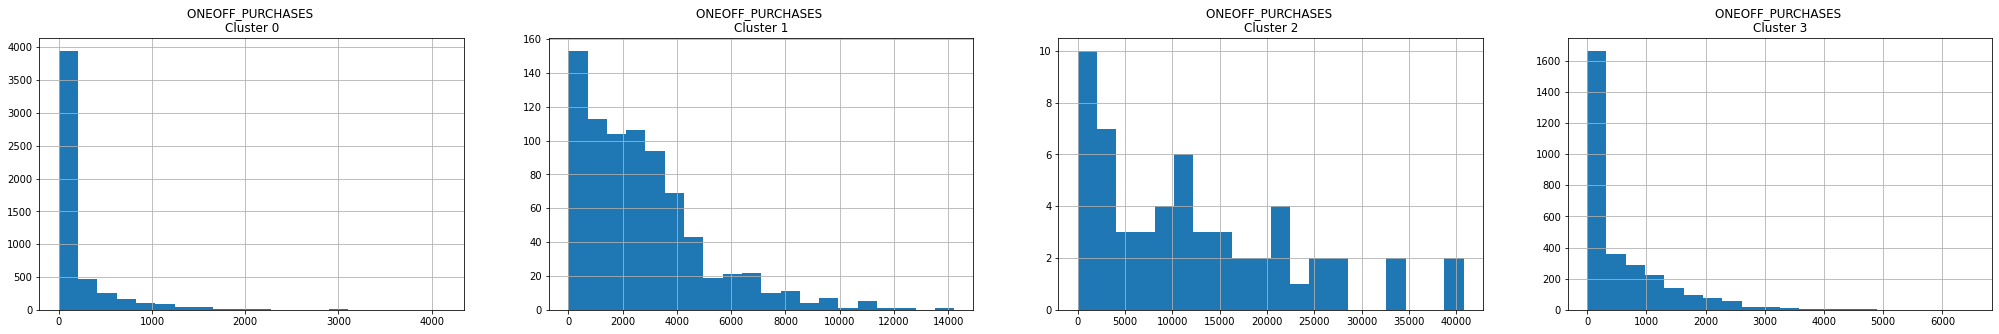

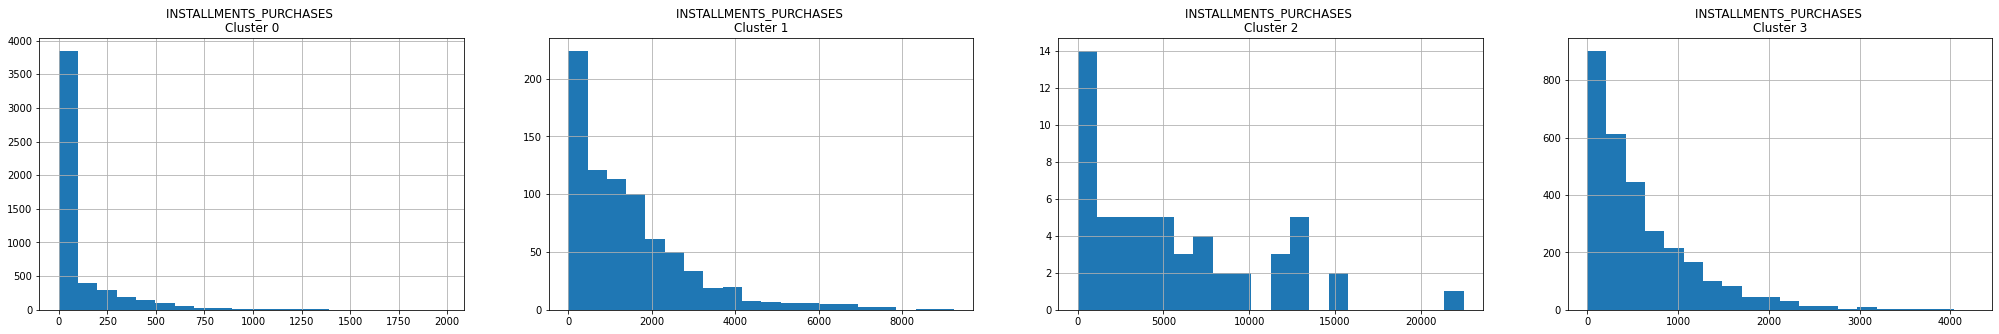

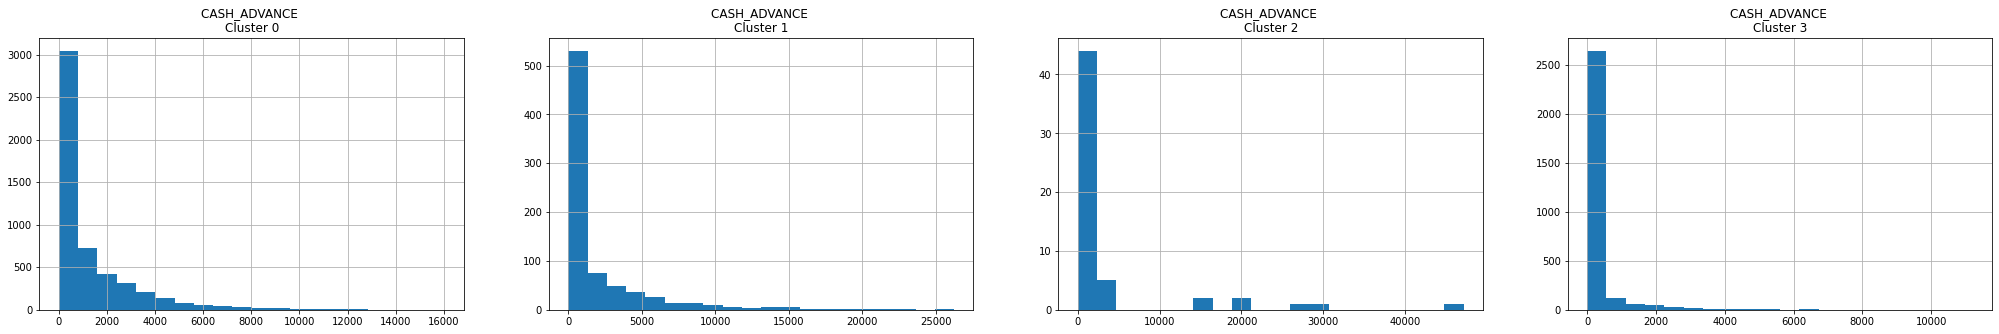

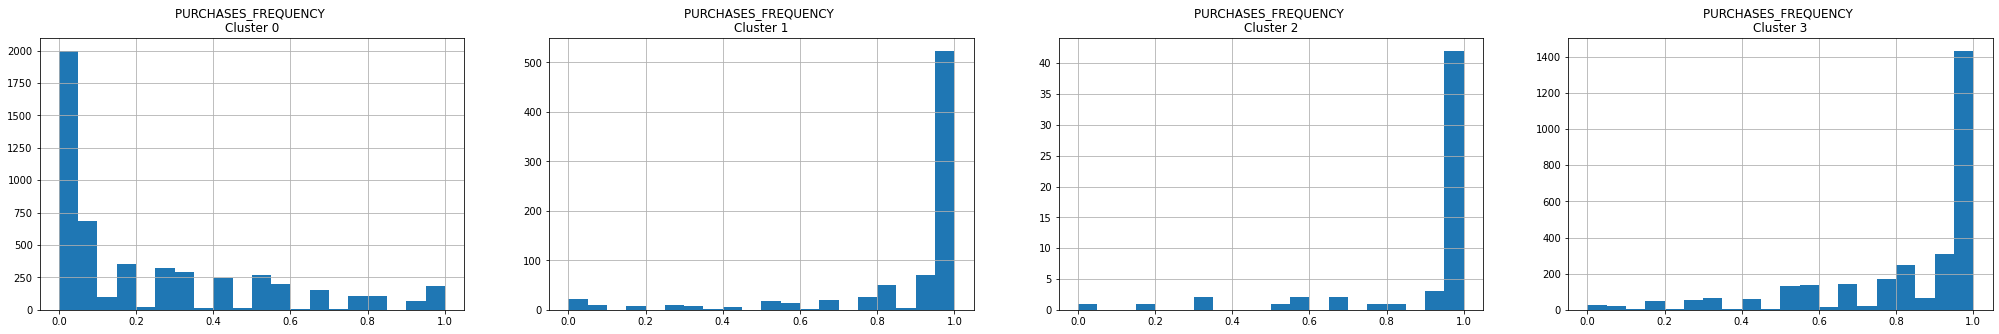

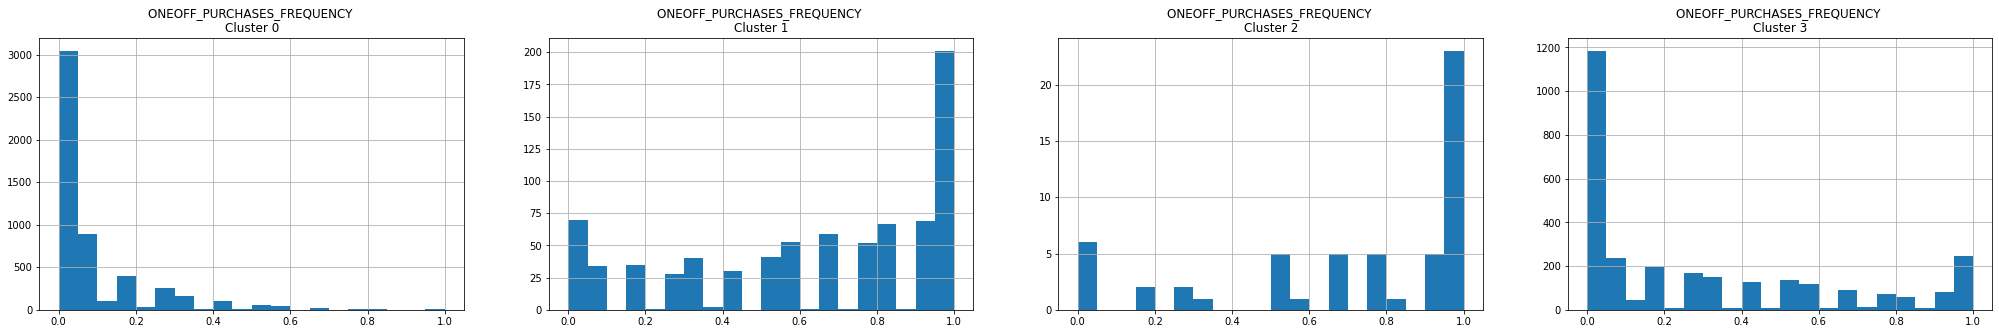

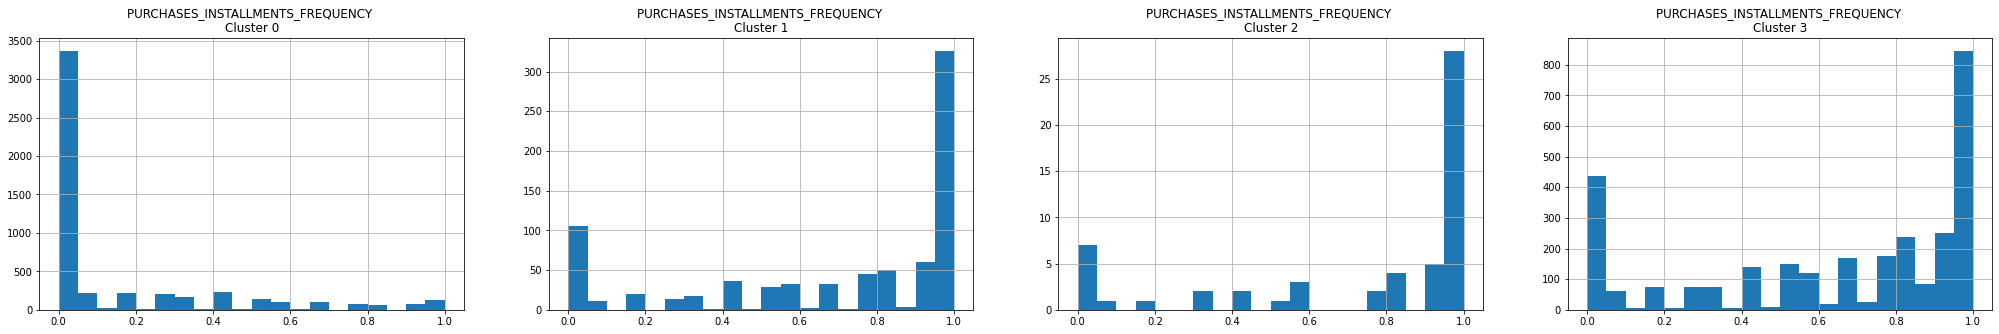

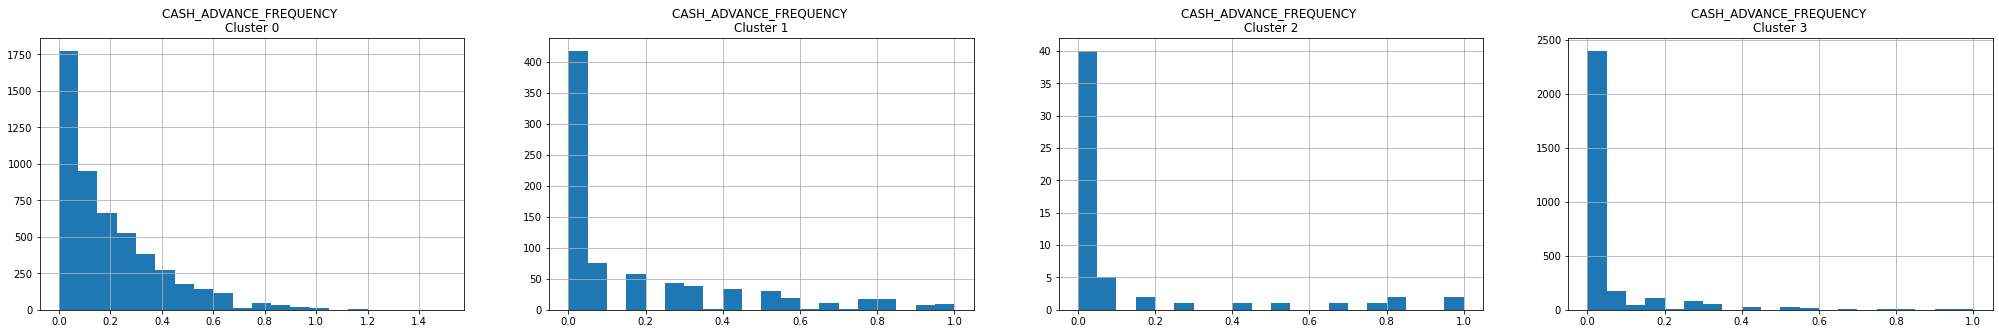

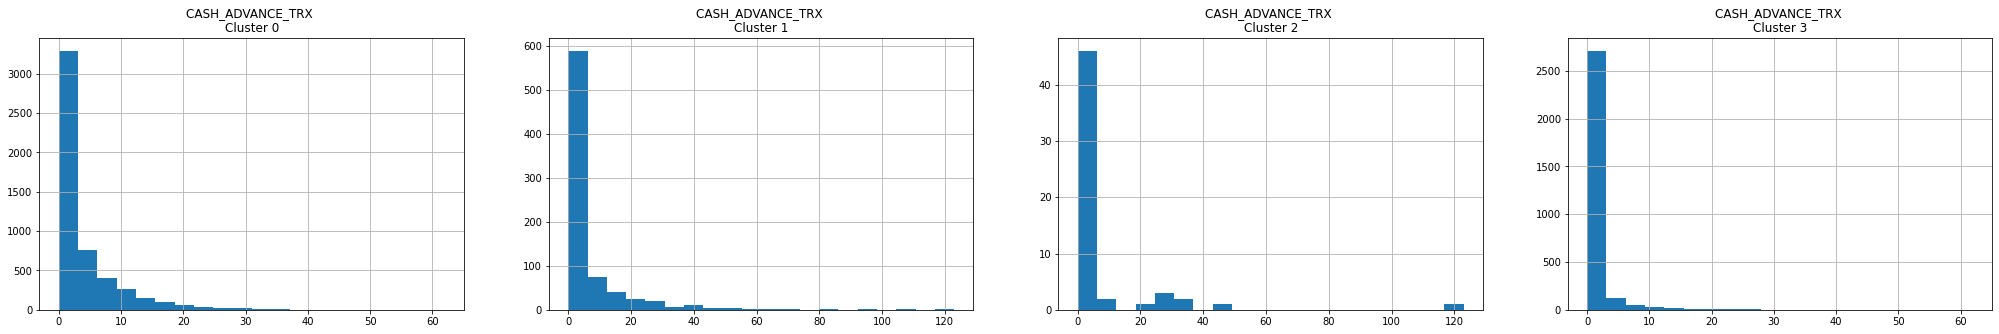

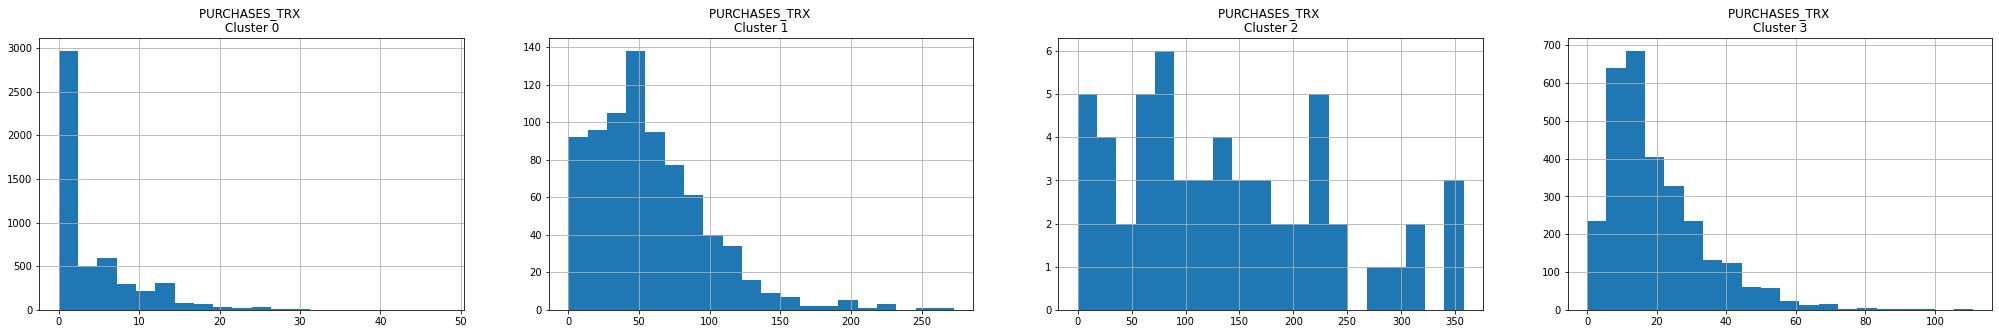

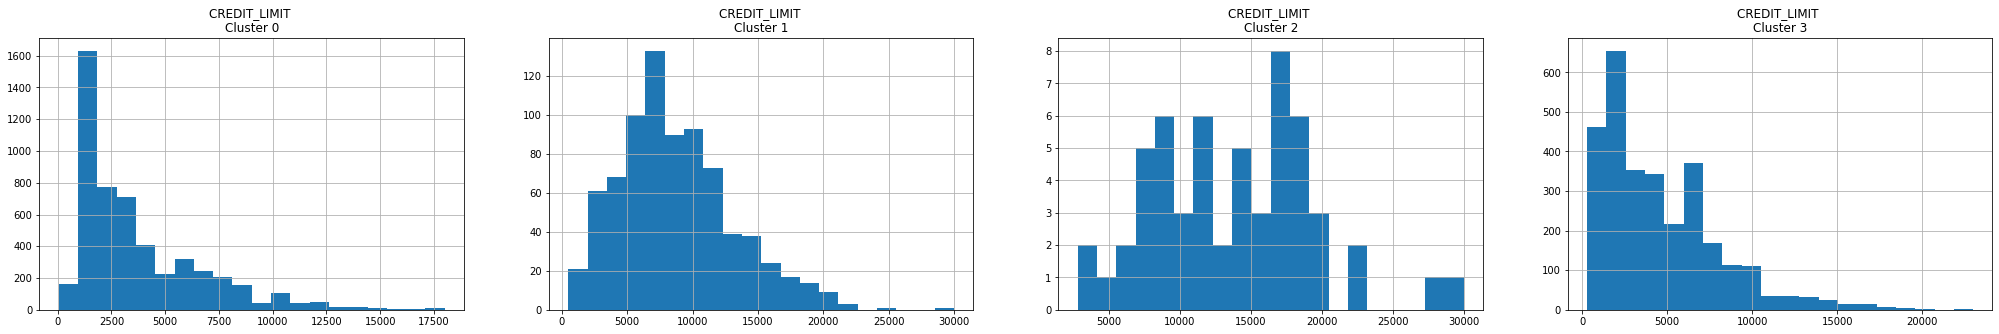

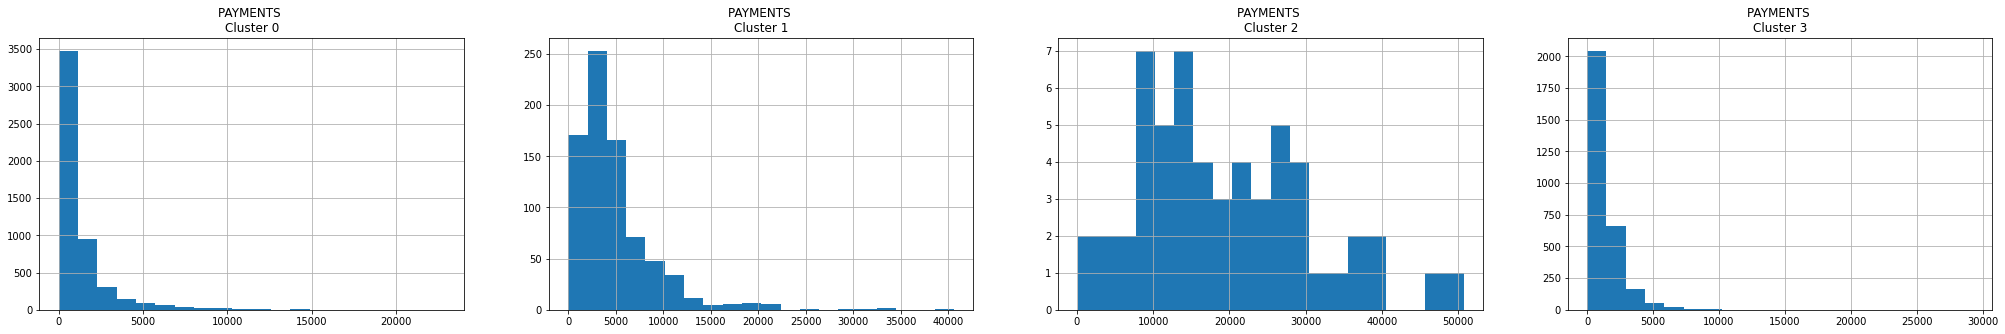

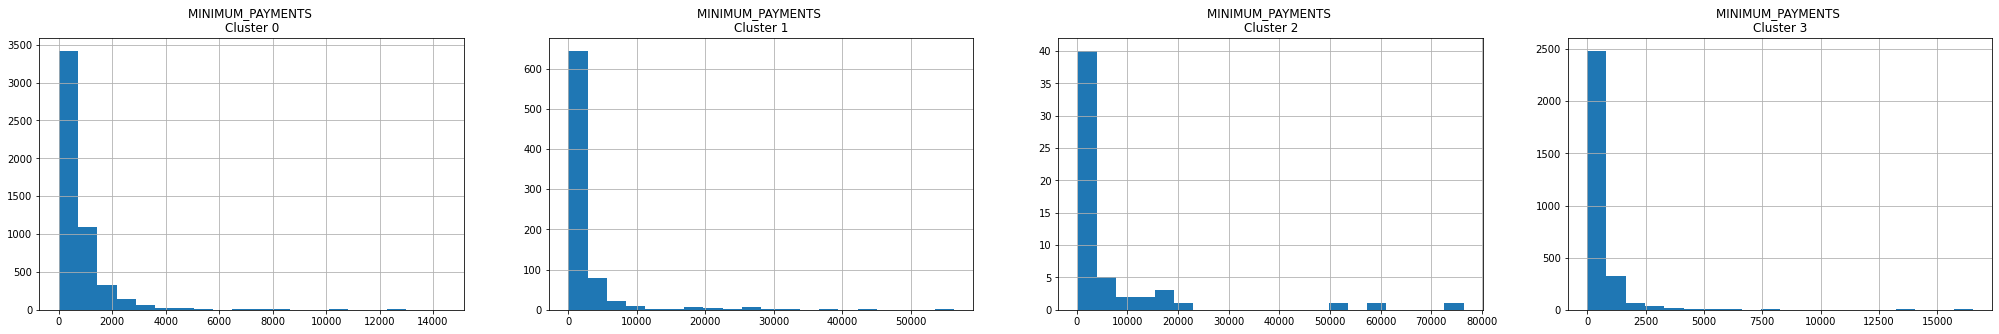

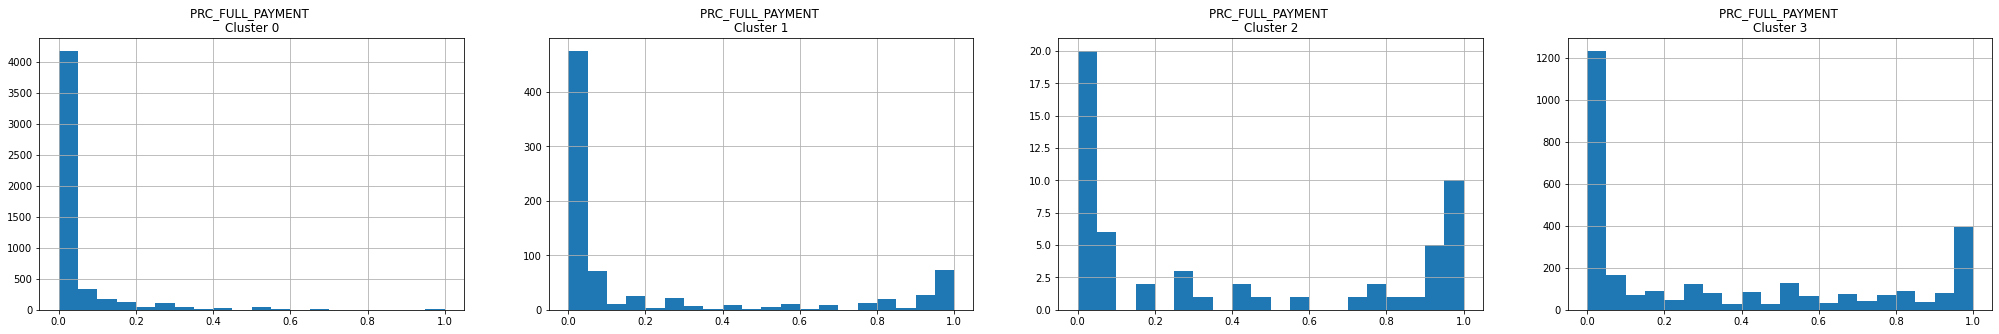

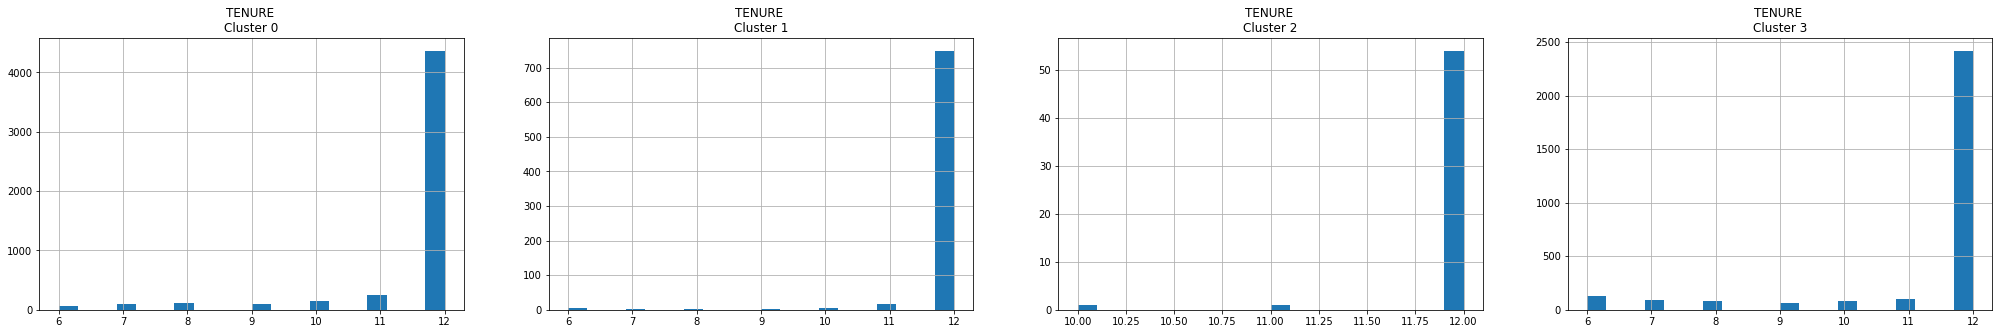

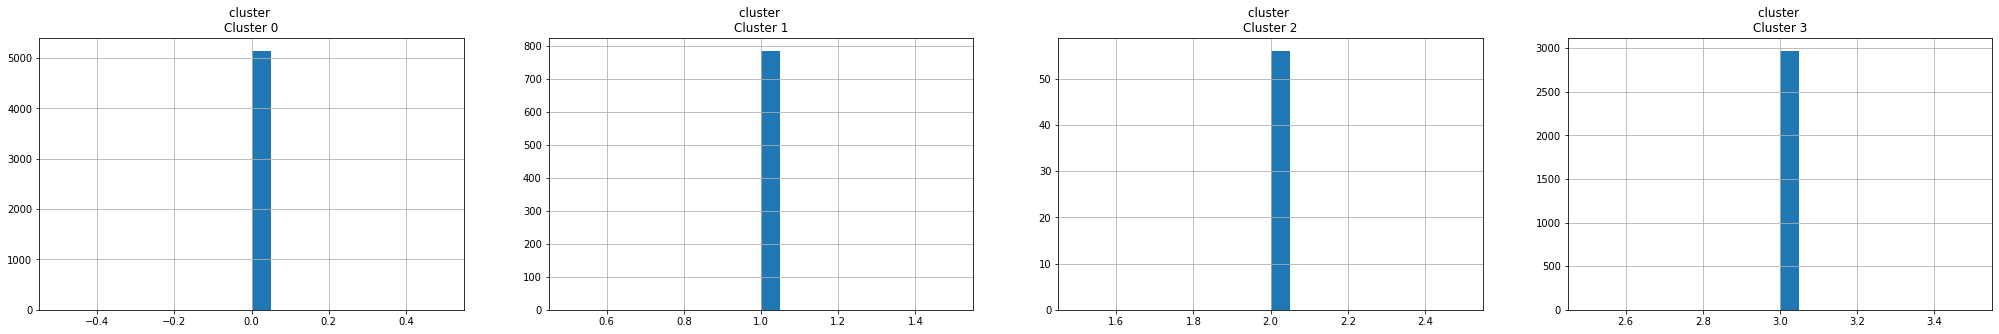

In [158]:
#----------------------------------------------------------------------------------------
# Plot the histogram of various clusters
#
#  For every single cluster, plot the Historgram for each column
#
#  Note: Optimal clusters is now 4
#----------------------------------------------------------------------------------------
optimal_clusters = 4
for i in predict_cluster.columns:
  plt.figure(figsize = (35,5))
  for j in range(optimal_clusters):
    plt.subplot(1, optimal_clusters, j+1)
    cluster = predict_cluster[predict_cluster['cluster'] == j ]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i,j))

  plt.show()

In [159]:
#----------------------------------------------------------------------------
#  Use PCA to reduce attributes to two components
#----------------------------------------------------------------------------

#----------------------------------------------------------------------------
# Obtain the principal components 
#
#  Let's reduce our number of features to just two by using PCA
#----------------------------------------------------------------------------
pca = PCA(n_components = 2)
principle_comp = pca.fit_transform(predict)
principle_comp

array([[-1.831859  , -0.29897332],
       [-0.7234707 ,  1.883126  ],
       [ 0.6752941 , -0.33419076],
       ...,
       [-0.06494266, -0.318549  ],
       [-0.98859286,  0.09309592],
       [ 0.24897476,  0.28792137]], dtype=float32)

In [160]:
#----------------------------------------------------------------------------
# Create a dataframe with the two components
#  Name the new columns 'pca1' and 'pca2'
#----------------------------------------------------------------------------
pca_df = pd.DataFrame(data = principle_comp, columns = ['PCA1', 'PCA2'])
pca_df.head(10)

,PCA1,PCA2
0,-1.831859,-0.298973
1,-0.723471,1.883126
2,0.675294,-0.334191
3,-0.218478,0.104242
4,-1.800537,-0.074020
5,-0.655720,-0.282241
6,5.437129,-2.287945
7,-0.707539,-0.306212
8,-0.912840,-0.410240
9,-0.143151,-0.718890


In [161]:
#----------------------------------------------------------------------------
# Concatenate the clusters labels to the dataframe
# This is similar to what we did above earlier
#----------------------------------------------------------------------------
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head(10)

,PCA1,PCA2,cluster
0,-1.831859,-0.298973,0
1,-0.723471,1.883126,0
2,0.675294,-0.334191,3
3,-0.218478,0.104242,0
4,-1.800537,-0.074020,0
5,-0.655720,-0.282241,0
6,5.437129,-2.287945,1
7,-0.707539,-0.306212,0
8,-0.912840,-0.410240,0
9,-0.143151,-0.718890,0


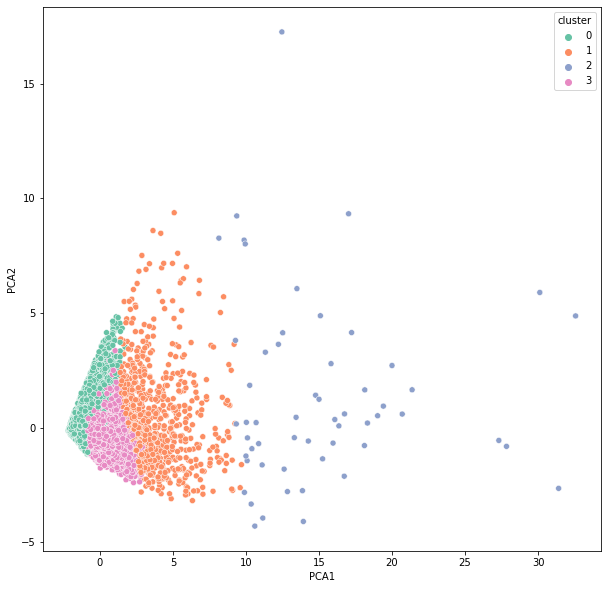

In [162]:
#----------------------------------------------------------------
#  Visualize the PCA Results
#----------------------------------------------------------------
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df, palette = 'Set2' )

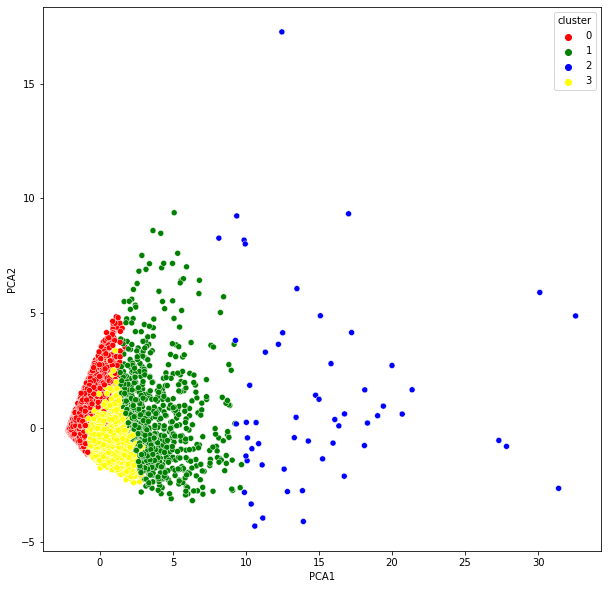

In [163]:
#----------------------------------------------------------------
#  Visualize the PCA Results - just different colors
#----------------------------------------------------------------
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'yellow'] )

Results from Classroom example are below

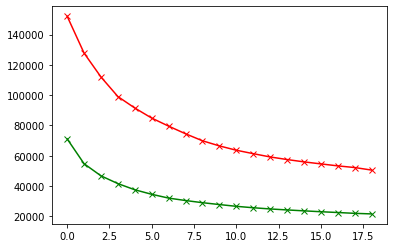

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


,pca1,pca2
0,-1.682221,-1.076451
1,-1.138299,2.506482
2,0.969680,-0.383501
3,-0.873630,0.043168
4,-1.599433,-0.688583


,pca1,pca2,cluster
0,-1.682221,-1.076451,3
1,-1.138299,2.506482,3
2,0.969680,-0.383501,3
3,-0.873630,0.043168,2
4,-1.599433,-0.688583,3


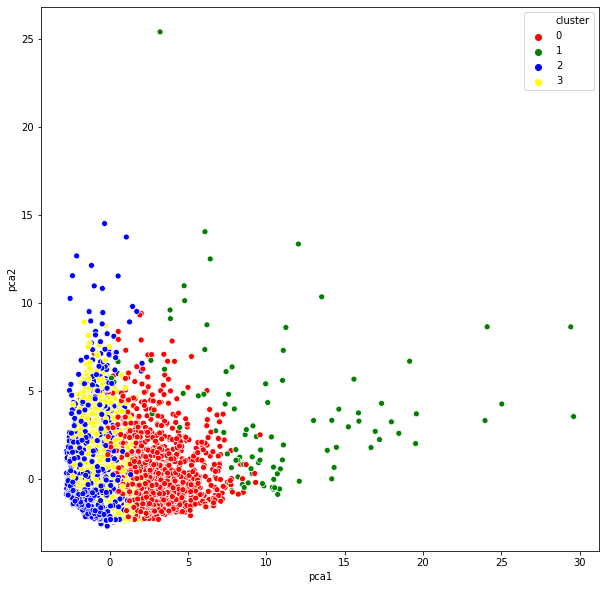

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS